# Import Libarys

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import folium

In [2]:
file = 'ist-daten-sbb.csv'
df = pd.read_csv(file, header=None, sep=';', engine='python')
df.columns = ['Betriebstag', 'Fahrt Bezeichner', 'Betreiber ID', 'Betreiber Abkürzung', 'Betreiber Name', 'Produkt ID', 'Linie', 'Linien Text', 'Umlauf ID', 'Verkehrsmittel Text', 'Zusatzfahrt TF', 'Fällt aus', 'BPUIC', 'Haltestellen Name', 'Ankunftszeit', 'An Prognose', 'An Prognose Status', 'Abfahrtszeit', 'Ab Prognose', 'Ab Prognose Status', 'Durchfahrt TF', 'Ankunftsverspätung', 'Abfahrtsverspätung', 'Geoposition', 'lod']
df = df[df['Fahrt Bezeichner'] != 'Fahrt Bezeichner']
# df.head()

In [3]:
# print(df.dtypes)

# Check for duplicates
# print("Number of duplicates:", df.duplicated().sum())

# df.isnull().sum()
# Visualize missing values
# msno.matrix(df)
# plt.show()

In [4]:
df = df.drop('lod', axis=1)
df = df.drop('Betreiber ID', axis=1) # ID of SBB
df = df.drop('Betreiber Name', axis=1) # Long form of SBB
df = df.drop('Produkt ID', axis=1)
df = df.drop('Umlauf ID', axis=1)
df = df.drop('Betriebstag', axis=1)
df = df.drop('Fahrt Bezeichner', axis=1)
df = df.drop('Betreiber Abkürzung', axis=1)
df = df.drop('BPUIC', axis=1)
df = df[df['Verkehrsmittel Text'] != 'ZUG']

df['Geoposition'] = df['Geoposition'].astype(str)
df['Lat'] = df['Geoposition'].apply(lambda x: x.split(',')[0] if ',' in x else None)
df['Lon'] = df['Geoposition'].apply(lambda x: x.split(',')[1] if ',' in x else None)
df = df.drop('Geoposition', axis=1)

df['Lat'] = df['Lat'].astype('float64')
df['Lon'] = df['Lon'].astype('float64')
df['Zusatzfahrt TF'].astype(bool)
df['Durchfahrt TF'].astype(bool)
df['Abfahrtszeit'] = pd.to_datetime(df['Abfahrtszeit'])
df['Ab Prognose'] = pd.to_datetime(df['Ab Prognose'])
df['Ankunftszeit'] = pd.to_datetime(df['Ankunftszeit'])
df['An Prognose'] = pd.to_datetime(df['An Prognose'])

if df['Ankunftsverspätung'].dtype == 'object':
    df['Ankunftsverspätung'] = df['Ankunftsverspätung'].str.lower() == 'true'
if df['Abfahrtsverspätung'].dtype == 'object':
    df['Abfahrtsverspätung'] = df['Abfahrtsverspätung'].str.lower() == 'true'
if df['Fällt aus'].dtype == 'object':
    df['Fällt aus'] = df['Fällt aus'].str.lower() == 'true'

df['Abfahrt Differenz'] = df['Ab Prognose'] - df['Abfahrtszeit']
df['Ankunft Differenz'] = df['An Prognose'] - df['Ankunftszeit']
df['Abfahrt Differenz Minutes'] = df['Abfahrt Differenz'].dt.total_seconds() / 60
df['Ankunft Differenz Minutes'] = df['Ankunft Differenz'].dt.total_seconds() / 60

## Colors & Plot Layout

<Figure size 800x100 with 0 Axes>

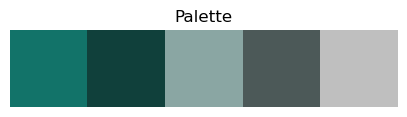

In [5]:
base_palette = ["#127369", "#10403B", "#8AA6A3", "#4C5958", "#BFBFBF"]
plt.figure(figsize=(8, 1))
sns.palplot(base_palette)
plt.title('Palette')
plt.axis('off')
plt.show()
color1 = base_palette[0]
color2 = base_palette[1]
color3 = base_palette[2]
color4 = base_palette[3]
color5 = base_palette[4]

In [6]:
from contextlib import contextmanager

@contextmanager
def custom_plot(figsize=(10, 6)):
    fig, ax = plt.subplots(figsize=figsize)
    try:
        yield ax
        sns.despine()
        ax.spines['bottom'].set_color(color4)
        ax.spines['left'].set_color(color4)
        ax.title.set_color(color4)
        ax.xaxis.label.set_color(color4)
        ax.yaxis.label.set_color(color4)
        ax.tick_params(axis='x', colors=color4)
        ax.tick_params(axis='y', colors=color4)
    finally:
        plt.tight_layout()
        plt.show()

In [7]:
@contextmanager
def custom_subplot(fig, position, figsize=(10, 6)):
    ax = fig.add_subplot(position)
    try:
        yield ax
        sns.despine()
        ax.spines['bottom'].set_color(color4)
        ax.spines['left'].set_color(color4)
        ax.title.set_color(color4)
        ax.xaxis.label.set_color(color4)
        ax.yaxis.label.set_color(color4)
        ax.tick_params(axis='x', colors=color4)
        ax.tick_params(axis='y', colors=color4)
    finally:
        plt.tight_layout()

## Stats

In [8]:
# # Value counts for each column
# for column in df.columns:
#     print(f'Value counts for {column}')
#     print(df[column].value_counts(), "\n")

In [9]:
# # Describe for each column
# for column in df.columns:
#     print(f'Describe for {column}')
#     print(df[column].describe(), "\n")

## Interactive Map

In [10]:
# import folium
# from folium.plugins import MarkerCluster

# # Erstellen Sie eine Basis-Karte
# base_map = folium.Map(location=[46.8182, 8.2275], zoom_start=8)  # Zentrum der Schweiz

# # Cluster für Marker erstellen
# marker_cluster = MarkerCluster().add_to(base_map)

# # Hinzufügen der Marker zur Karte
# for idx, row in df.iterrows():
#     if not pd.isna(row['Lat']) and not pd.isna(row['Lon']):
#         folium.Marker(
#             location=[row['Lat'], row['Lon']],
#             popup=f"Lat: {row['Lat']}, Lon: {row['Lon']}"
#         ).add_to(marker_cluster)

# # Karte anzeigen
# base_map.save("map.html")
# display(base_map)

## Delays per hour

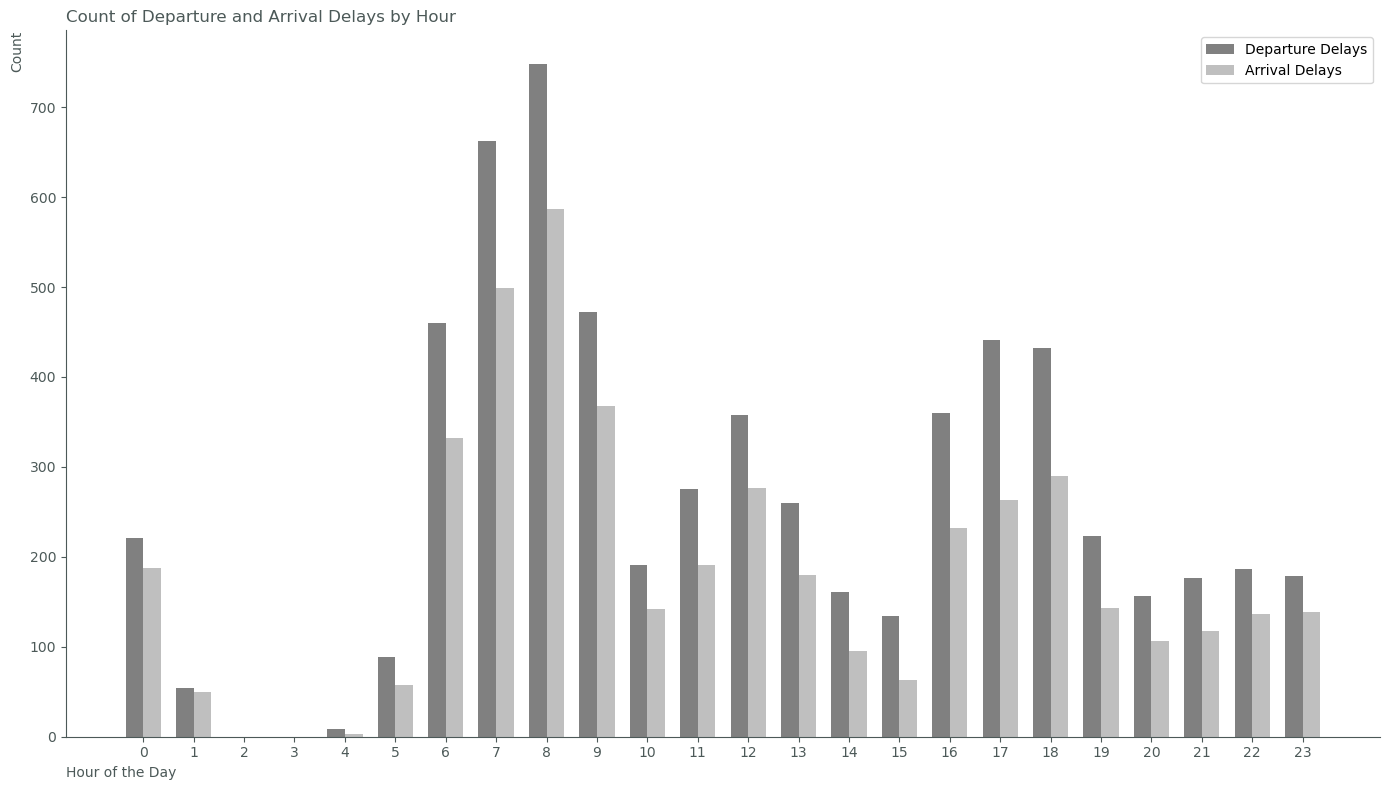

In [11]:
filtered_delays_df = df[(df['Abfahrtsverspätung'] == True) | (df['Ankunftsverspätung'] == True)]
filtered_delays_df = filtered_delays_df[(filtered_delays_df['Abfahrt Differenz'] > pd.Timedelta(0)) & (filtered_delays_df['Ankunft Differenz'] > pd.Timedelta(0))]

filtered_delays_df['Abfahrtszeit Hour'] = filtered_delays_df['Abfahrtszeit'].dt.hour
filtered_delays_df['Ankunftszeit Hour'] = filtered_delays_df['Ankunftszeit'].dt.hour

departure_hour_counts = filtered_delays_df[filtered_delays_df['Abfahrtsverspätung'] == True]['Abfahrtszeit Hour'].value_counts().sort_index()
arrival_hour_counts = filtered_delays_df[filtered_delays_df['Ankunftsverspätung'] == True]['Ankunftszeit Hour'].value_counts().sort_index()

departure_hour_counts = departure_hour_counts.reindex(np.arange(0, 24), fill_value=0)
arrival_hour_counts = arrival_hour_counts.reindex(np.arange(0, 24), fill_value=0)

# bar_colors = ['blue' if 6 <= hour <= 9 or 17 <= hour <= 18 or 12 == hour else 'grey' for hour in hour_counts.index]

with custom_plot(figsize=(14, 8)) as ax:
    width = 0.35  # Width of the bars
    x = np.arange(24)  # The label locations
    ax.bar(x - width/2, departure_hour_counts, width, label='Departure Delays', color='grey')
    ax.bar(x + width/2, arrival_hour_counts, width, label='Arrival Delays', color=color5)
    
    ax.set_title('Count of Departure and Arrival Delays by Hour', loc='left', color=color4)
    ax.set_xlabel('Hour of the Day', loc='left', color=color4)
    ax.set_ylabel('Count', loc='top', color=color4)
    ax.set_xticks(x)
    ax.set_xticklabels(x, color=color4)
    ax.tick_params(axis='x', rotation=0)
    ax.tick_params(axis='y', rotation=0)
    
    ax.legend()

plt.show()


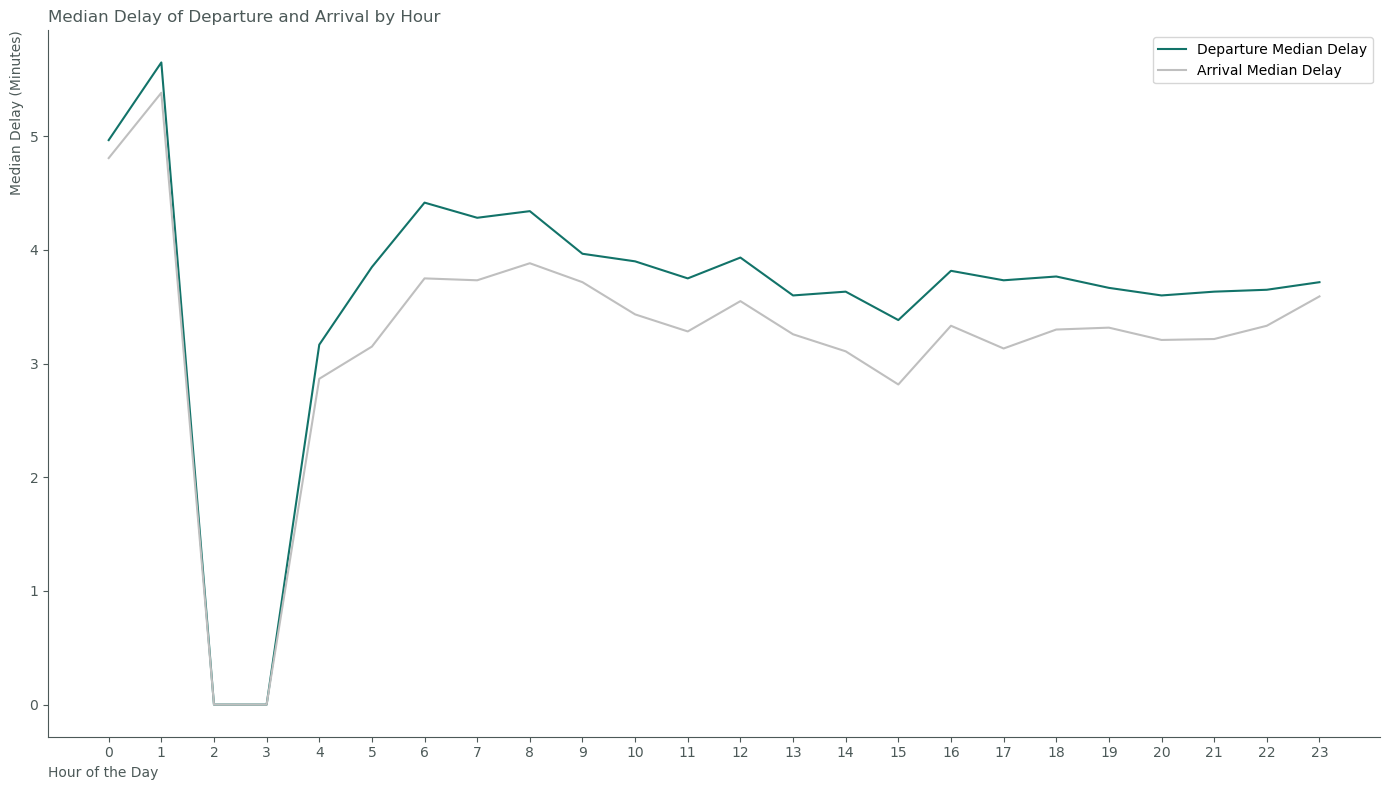

In [12]:
median_departure_delay = filtered_delays_df.groupby('Abfahrtszeit Hour')['Abfahrt Differenz'].median().reindex(np.arange(0, 24), fill_value=pd.Timedelta(0))
median_arrival_delay = filtered_delays_df.groupby('Ankunftszeit Hour')['Ankunft Differenz'].median().reindex(np.arange(0, 24), fill_value=pd.Timedelta(0))

median_departure_delay_minutes = median_departure_delay.dt.total_seconds() / 60
median_arrival_delay_minutes = median_arrival_delay.dt.total_seconds() / 60

with custom_plot(figsize=(14, 8)) as ax:
    x = np.arange(24) 
    ax.plot(x, median_departure_delay_minutes, label='Departure Median Delay', color=color1)
    ax.plot(x, median_arrival_delay_minutes, label='Arrival Median Delay', color=color5)
    
    ax.set_title('Median Delay of Departure and Arrival by Hour', loc='left', color=color4)
    ax.set_xlabel('Hour of the Day', loc='left', color=color4)
    ax.set_ylabel('Median Delay (Minutes)', loc='top', color=color4)
    ax.set_xticks(x)
    ax.set_xticklabels(x, color=color4)
    ax.tick_params(axis='x', rotation=0)
    ax.tick_params(axis='y', rotation=0)
    
    ax.legend()

plt.show()


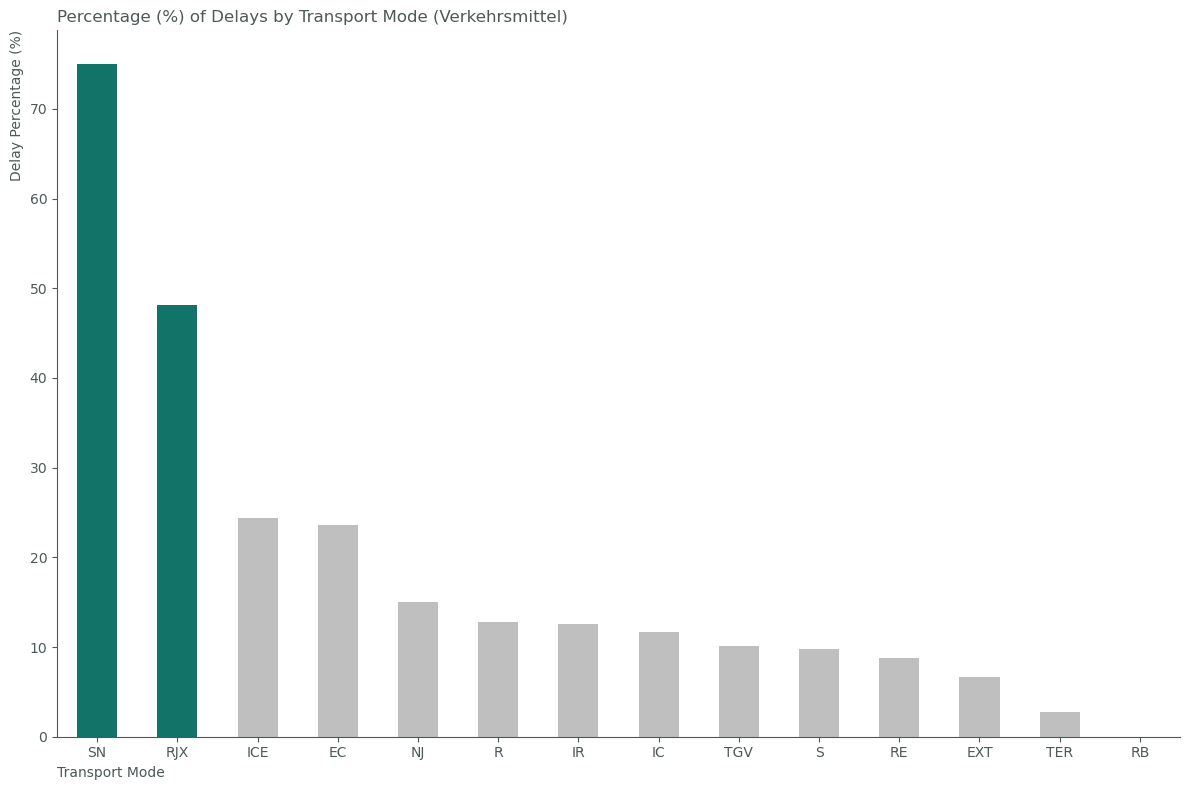

In [13]:
total_counts = df['Verkehrsmittel Text'].value_counts()

delay_counts = filtered_delays_df['Verkehrsmittel Text'].value_counts()

delay_percentage = (delay_counts / total_counts * 100).fillna(0).sort_values(ascending=False)

colors = [color1 if i == 0 or i ==1 else color5 for i in range(len(delay_percentage))]

with custom_plot(figsize=(12, 8)) as ax:
    delay_percentage.plot(kind='bar', color=colors, ax=ax)
    ax.set_title('Percentage (%) of Delays by Transport Mode (Verkehrsmittel)', loc='left', color=color4)
    ax.set_xlabel('Transport Mode', loc='left', color=color4)
    ax.set_ylabel('Delay Percentage (%)', loc='top', color=color4)
    ax.tick_params(axis='x', rotation=0, color=color4)
    ax.tick_params(axis='y', color=color4)

plt.show()

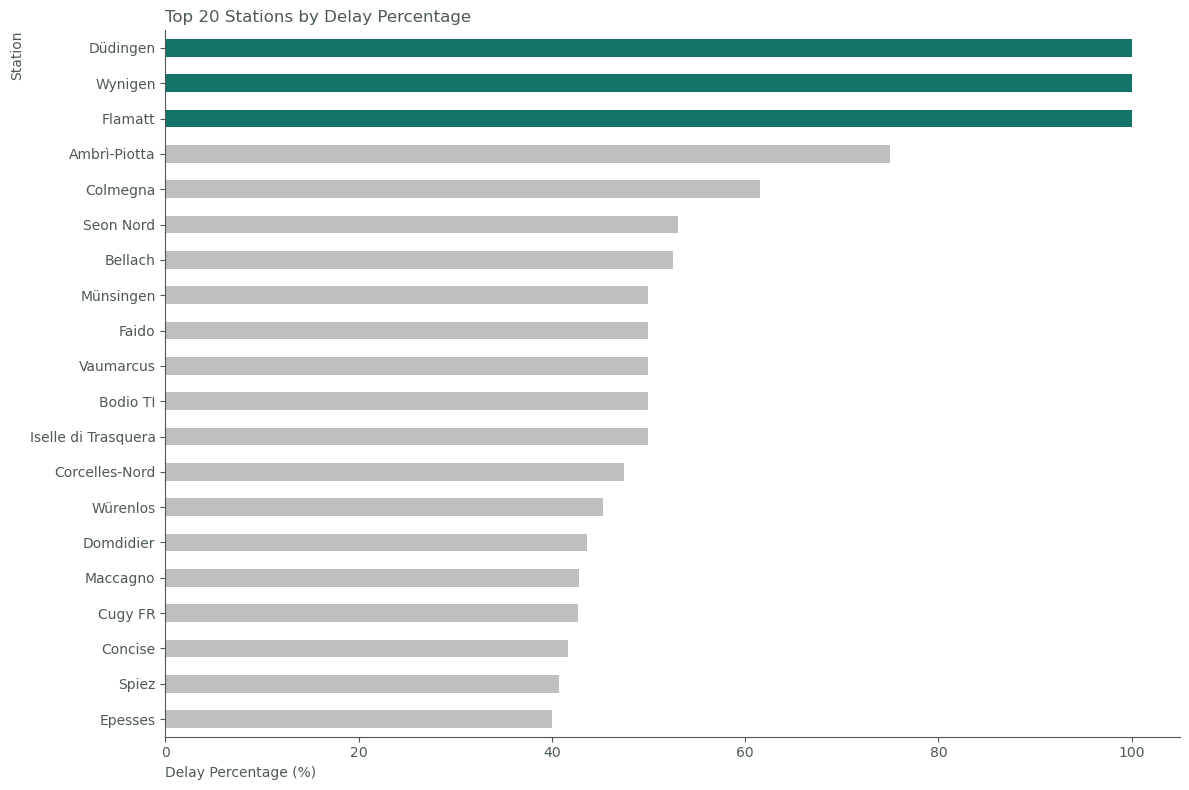

In [14]:
total_counts = df['Haltestellen Name'].value_counts()

delay_counts = filtered_delays_df['Haltestellen Name'].value_counts()

delay_percentage = (delay_counts / total_counts * 100).fillna(0).sort_values(ascending=False)

top20_delay_percentage = delay_percentage.head(20)

colors = [color1 if i <= 2 else color5 for i in range(len(top20_delay_percentage))]

with custom_plot(figsize=(12, 8)) as ax:
    top20_delay_percentage.plot(kind='barh', color=colors, ax=ax)
    ax.set_title('Top 20 Stations by Delay Percentage', loc='left', color=color4)
    ax.set_xlabel('Delay Percentage (%)', loc='left', color=color4)
    ax.set_ylabel('Station', loc='top', color=color4)
    ax.tick_params(axis='x', color=color4)
    ax.tick_params(axis='y', color=color4)
    ax.invert_yaxis()
    
plt.show()

## Frequency of different Transport Mode

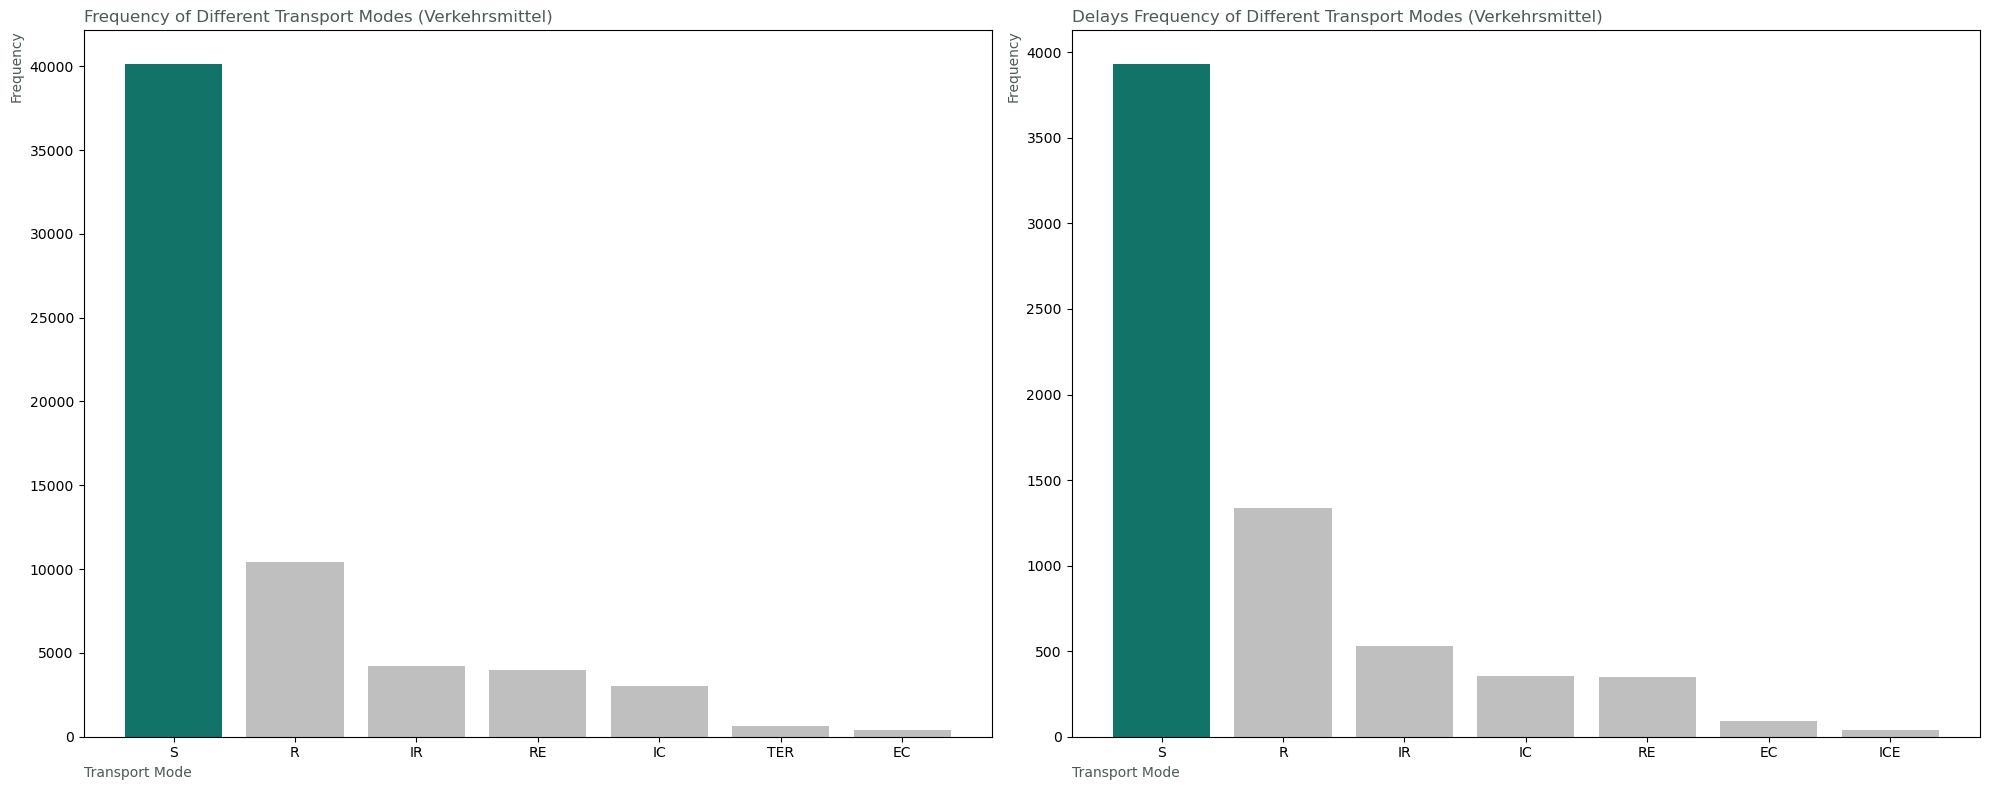

In [15]:
verkehrsmittel_counts = df['Verkehrsmittel Text'].value_counts().head(7)
verkehrsmittel_delays_counts = filtered_delays_df['Verkehrsmittel Text'].value_counts().head(7)

colors = [color1, color5, color5, color5, color5, color5, color5]
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot the frequency of different transport modes
axes[0].bar(verkehrsmittel_counts.index, verkehrsmittel_counts, color=colors)
axes[0].set_title('Frequency of Different Transport Modes (Verkehrsmittel)', loc='left', color=color4)
axes[0].set_xlabel('Transport Mode', loc='left', color=color4)
axes[0].set_ylabel('Frequency', loc='top', color=color4)
axes[0].tick_params(axis='x')

# Plot the delays frequency of different transport modes
axes[1].bar(verkehrsmittel_delays_counts.index, verkehrsmittel_delays_counts, color=colors)
axes[1].set_title('Delays Frequency of Different Transport Modes (Verkehrsmittel)', loc='left', color=color4)
axes[1].set_xlabel('Transport Mode', loc='left', color=color4)
axes[1].set_ylabel('Frequency', loc='top', color=color4)
axes[1].tick_params(axis='x')

plt.tight_layout()
plt.show()


## Top 10 Stations

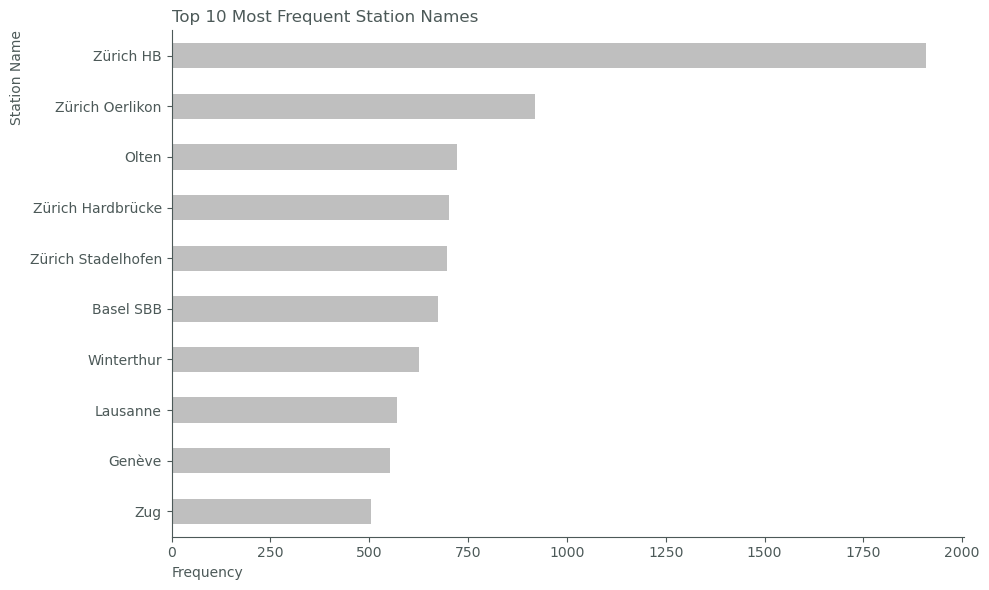

In [16]:
top10_stations = df['Haltestellen Name'].value_counts().head(10)

with custom_plot() as ax:
    top10_stations.plot(kind='barh', color=color5, ax=ax)
    ax.set_title('Top 10 Most Frequent Station Names', loc='left', color=color4)
    ax.set_xlabel('Frequency', loc='left', color=color4)
    ax.set_ylabel('Station Name', loc='top', color=color4)
    ax.tick_params(axis='y', rotation=0, color=color4)
    ax.invert_yaxis()

In [17]:
df_copy = df.copy()
df_zürich = df_copy[df_copy['Haltestellen Name'].apply(lambda x: 'Zürich' in x)]
df_zürich.columns
df_zürich['Haltestellen Name'].value_counts().sum()
df_zürich['Ankunftsverspätung'].value_counts()
df_zürich['Abfahrtsverspätung'].value_counts()
df_zürich['Ankunftsverspätung'].mean()
df_zürich['Abfahrtsverspätung'].mean()

0.06292924452962785

# Delays and Cancellation (TF)

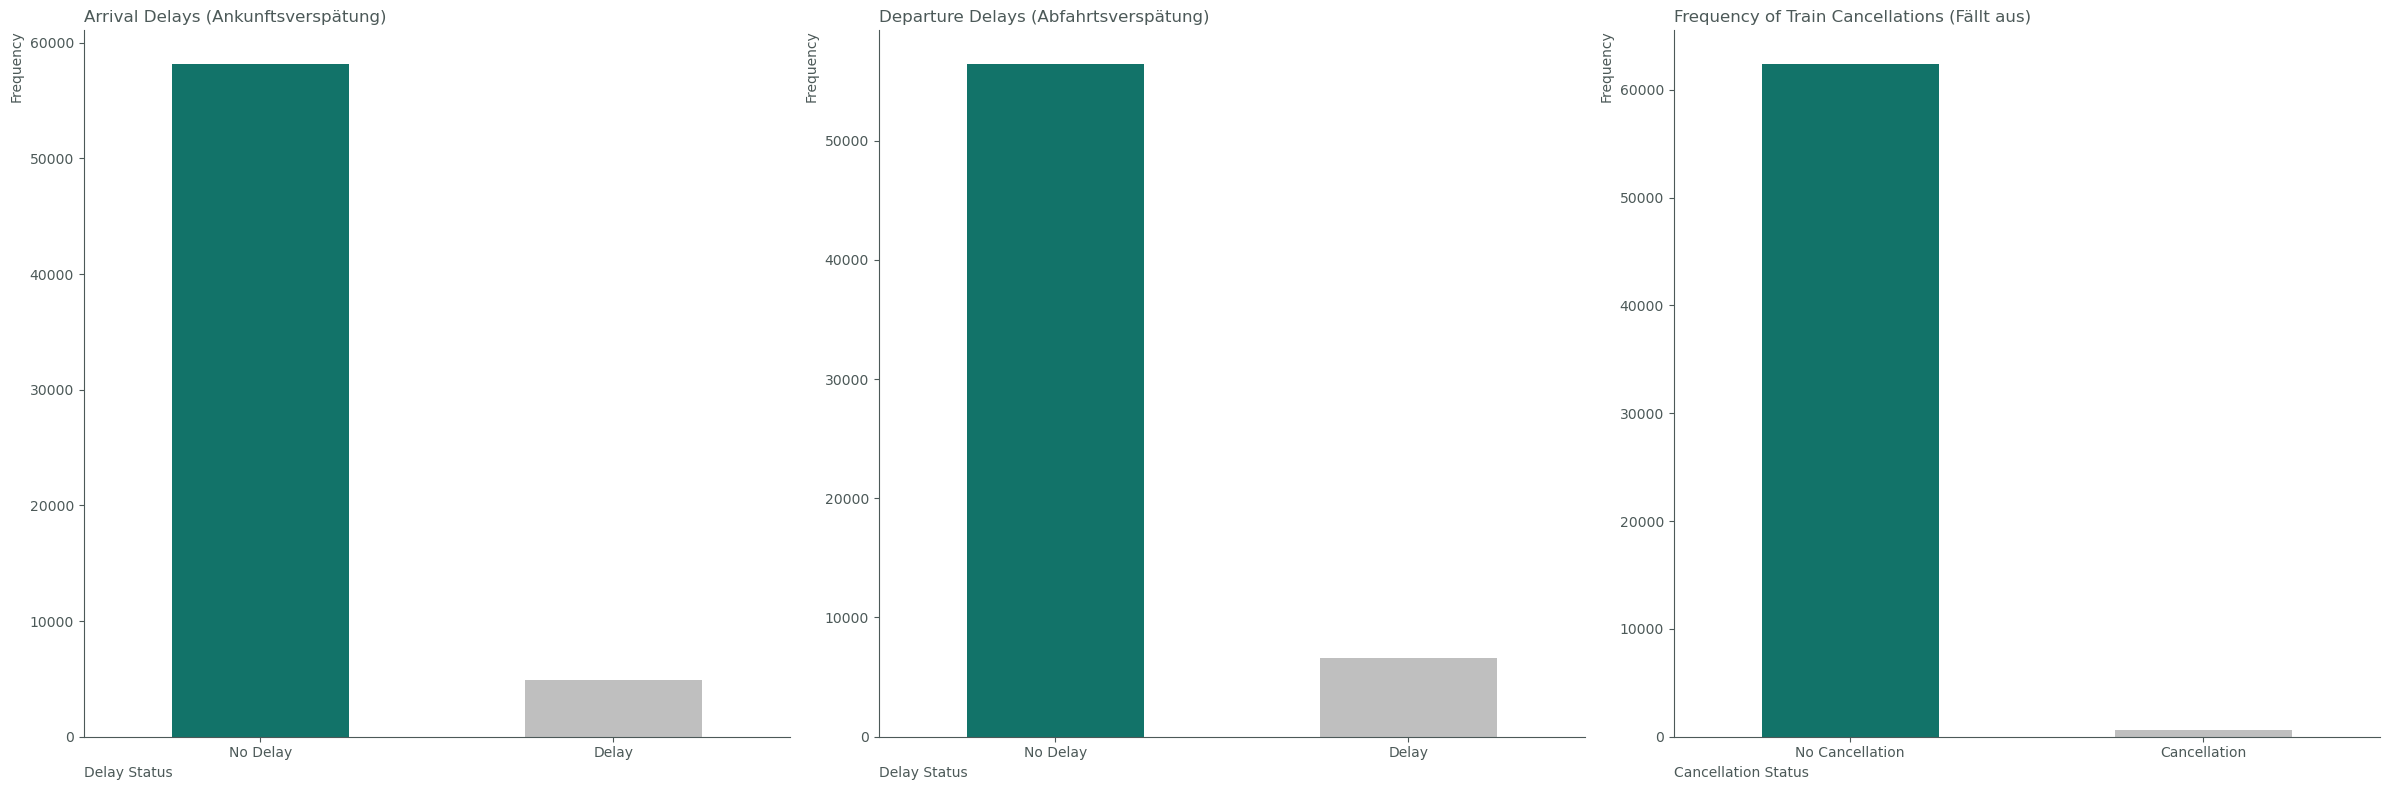

In [18]:
# Prepare your data
arrival_delay_counts = df['Ankunftsverspätung'].value_counts()
departure_delay_counts = df['Abfahrtsverspätung'].value_counts()
cancellation_counts = df['Fällt aus'].value_counts()

fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Manually applying the custom styles without using the context manager
# Plot the arrival delay counts
arrival_delay_counts.plot(kind='bar', color=[color1, color5], ax=axes[0])
sns.despine(ax=axes[0])
axes[0].spines['bottom'].set_color(color4)
axes[0].spines['left'].set_color(color4)
axes[0].set_title('Arrival Delays (Ankunftsverspätung)', loc='left', color=color4)
axes[0].set_xlabel('Delay Status', loc='left', color=color4)
axes[0].set_ylabel('Frequency', loc='top', color=color4)
axes[0].set_xticklabels(['No Delay', 'Delay'], rotation=0, color=color4)
axes[0].tick_params(axis='x', colors=color4)
axes[0].tick_params(axis='y', colors=color4)

# Plot the departure delay counts
departure_delay_counts.plot(kind='bar', color=[color1, color5], ax=axes[1])
sns.despine(ax=axes[1])
axes[1].spines['bottom'].set_color(color4)
axes[1].spines['left'].set_color(color4)
axes[1].set_title('Departure Delays (Abfahrtsverspätung)', loc='left', color=color4)
axes[1].set_xlabel('Delay Status', loc='left', color=color4)
axes[1].set_ylabel('Frequency', loc='top', color=color4)
axes[1].set_xticklabels(['No Delay', 'Delay'], rotation=0, color=color4)
axes[1].tick_params(axis='x', colors=color4)
axes[1].tick_params(axis='y', colors=color4)

# Plot the cancellation counts
cancellation_counts.plot(kind='bar', color=[color1, color5], ax=axes[2])
sns.despine(ax=axes[2])
axes[2].spines['bottom'].set_color(color4)
axes[2].spines['left'].set_color(color4)
axes[2].set_title('Frequency of Train Cancellations (Fällt aus)', loc='left', color=color4)
axes[2].set_xlabel('Cancellation Status', loc='left', color=color4)
axes[2].set_ylabel('Frequency', loc='top', color=color4)
axes[2].tick_params(axis='x', colors=color4)
axes[2].tick_params(axis='y', colors=color4)
axes[2].set_xticklabels(['No Cancellation', 'Cancellation'], rotation=0, color=color4)

plt.tight_layout()
plt.show()


## Station counts

C:\Users\acer\AppData\Local\Temp\ipykernel_11744\469318162.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\acer\AppData\Local\Temp\ipykernel_11744\469318162.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\acer\AppData\Local\Temp\ipykernel_11744\201824597.py:38: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


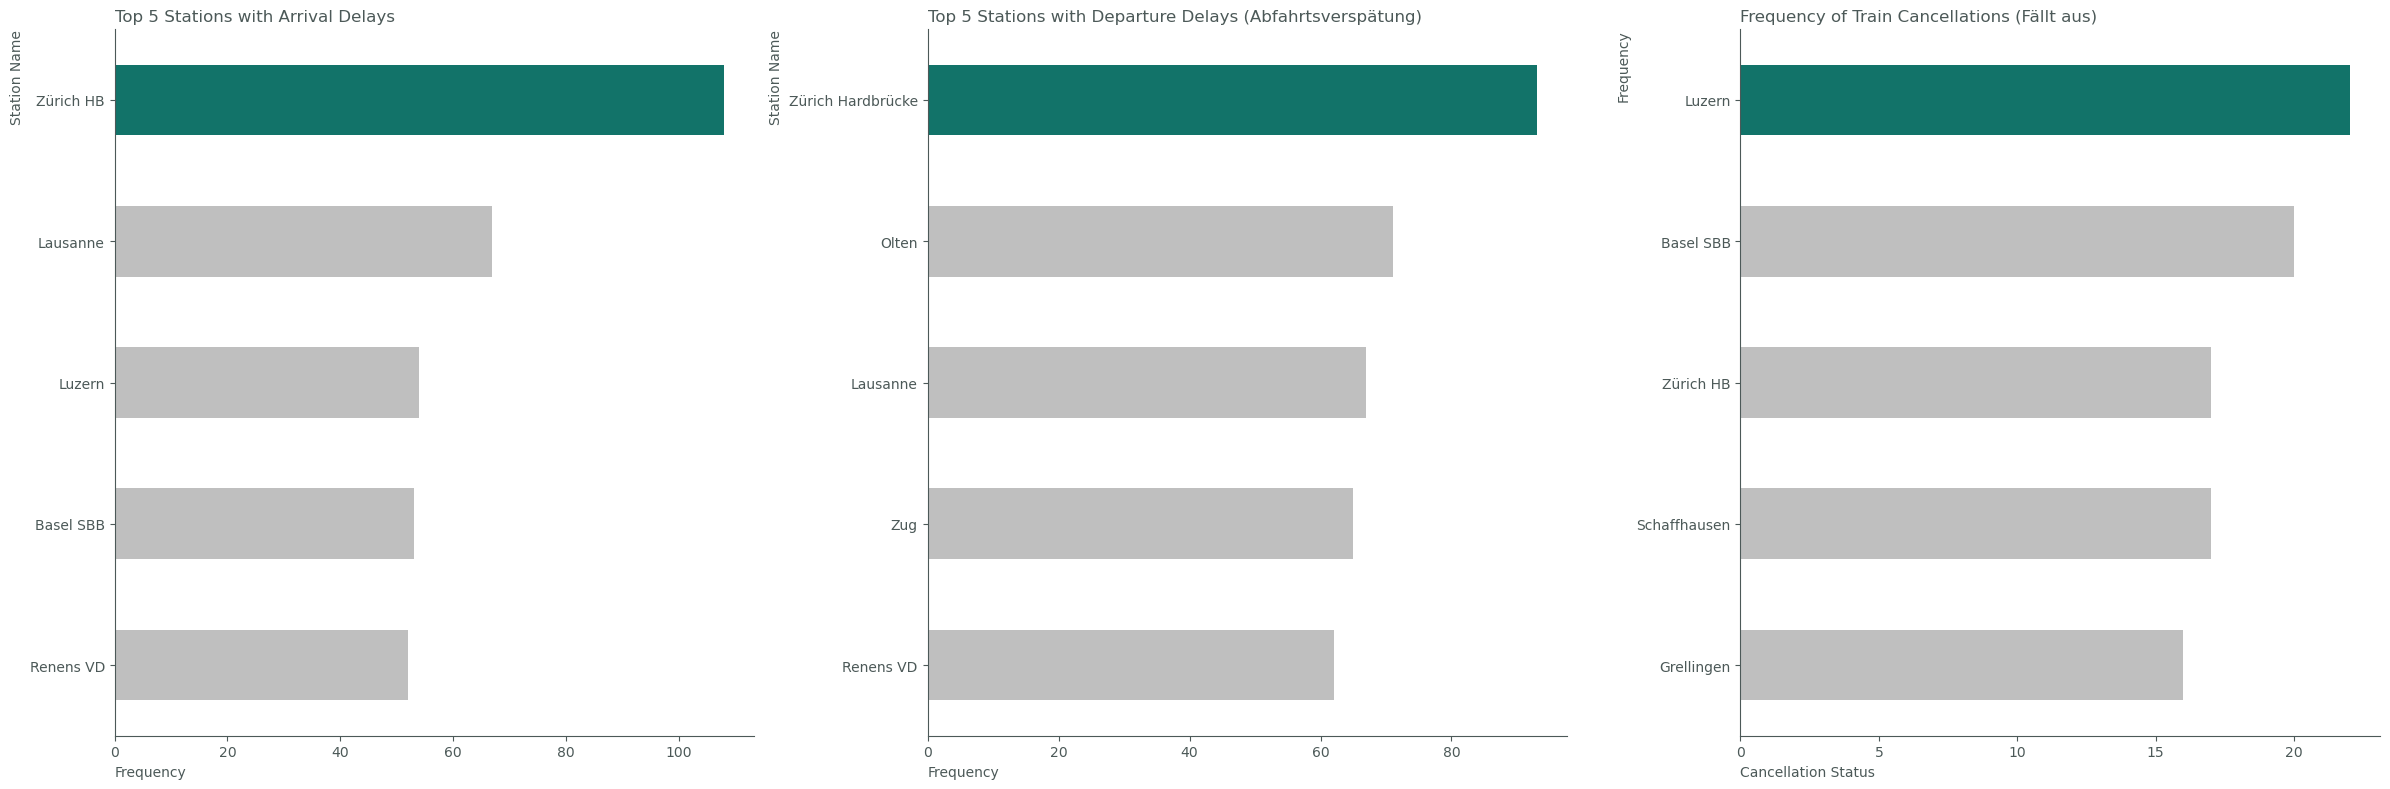

In [19]:
arrival_delay_counts = df[df['Ankunftsverspätung'] == True]['Haltestellen Name'].value_counts().head(5)
departure_delay_counts = df[df['Abfahrtsverspätung'] == True]['Haltestellen Name'].value_counts().head(5)
cancellation_counts = df[df['Fällt aus'] == True]['Haltestellen Name'].value_counts().head(5)

colors_arrival = [color1, color5, color5, color5, color5]
colors_departure = [color1, color5, color5, color5, color5]
colors_cancellation = [color1, color5, color5, color5, color5]

fig = plt.figure(figsize=(24, 8))

# Plot the top 5 stations with arrival delays
with custom_subplot(fig, 131) as ax:
    arrival_delay_counts.plot(kind='barh', color=colors_arrival, ax=ax)
    ax.set_title('Top 5 Stations with Arrival Delays', loc='left', color=color4)
    ax.set_ylabel('Station Name', loc='top', color=color4)
    ax.set_xlabel('Frequency', loc='left', color=color4)
    ax.tick_params(axis='y', rotation=0)
    ax.invert_yaxis()

# Plot the top 5 stations with departure delays
with custom_subplot(fig, 132) as ax:
    departure_delay_counts.plot(kind='barh', color=colors_departure, ax=ax)
    ax.set_title('Top 5 Stations with Departure Delays (Abfahrtsverspätung)', loc='left', color=color4)
    ax.set_ylabel('Station Name', loc='top', color=color4)
    ax.set_xlabel('Frequency', loc='left', color=color4)
    ax.tick_params(axis='y', rotation=0)
    ax.invert_yaxis()

# Plot the top 5 stations with cancellations
with custom_subplot(fig, 133) as ax:
    cancellation_counts.plot(kind='barh', color=colors_cancellation, ax=ax)
    ax.set_title('Frequency of Train Cancellations (Fällt aus)', loc='left', color=color4)
    ax.set_xlabel('Cancellation Status', loc='left', color=color4)
    ax.set_ylabel('Frequency', loc='top', color=color4)
    ax.tick_params(axis='x')
    ax.invert_yaxis()

plt.tight_layout()
plt.show()


## Means of transport

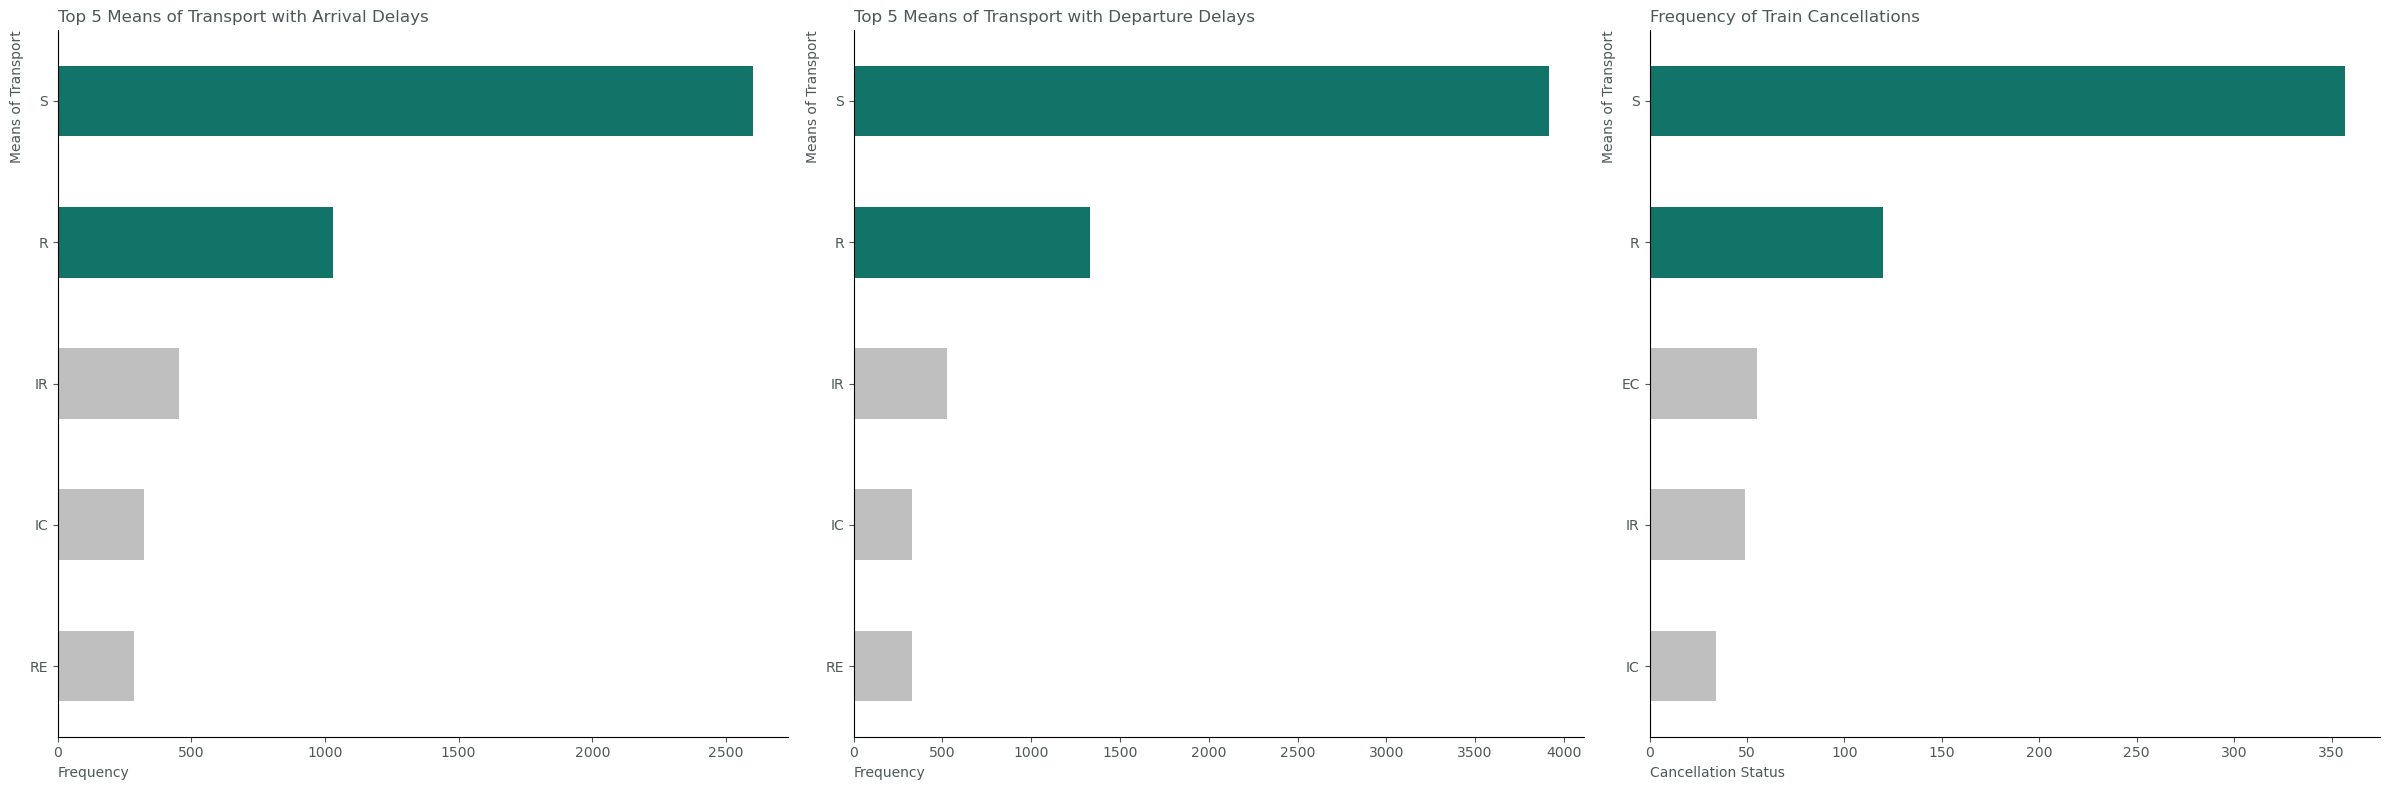

In [20]:
arrival_delay_counts = df[df['Ankunftsverspätung'] == True]['Verkehrsmittel Text'].value_counts().head(5)
departure_delay_counts = df[df['Abfahrtsverspätung'] == True]['Verkehrsmittel Text'].value_counts().head(5)
cancellation_counts = df[df['Fällt aus'] == True]['Verkehrsmittel Text'].value_counts().head(5)

colors_arrival = [color1, color1, color5, color5, color5]
colors_departure = [color1, color1, color5, color5, color5]
colors_cancellation = [color1, color1, color5, color5, color5]

fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Plot the top 5 means of transport with arrival delays
arrival_delay_counts.plot(kind='barh', color=colors_arrival, ax=axes[0])
axes[0].set_title('Top 5 Means of Transport with Arrival Delays', loc='left', color=color4)
axes[0].set_ylabel('Means of Transport', loc='top', color=color4)
axes[0].set_xlabel('Frequency', loc='left', color=color4)
axes[0].tick_params(axis='y', rotation=0, colors=color4)
axes[0].tick_params(axis='x', colors=color4)
axes[0].invert_yaxis()
sns.despine(ax=axes[0])

# Plot the top 5 means of transport with departure delays
departure_delay_counts.plot(kind='barh', color=colors_departure, ax=axes[1])
axes[1].set_title('Top 5 Means of Transport with Departure Delays', loc='left', color=color4)
axes[1].set_ylabel('Means of Transport', loc='top', color=color4)
axes[1].set_xlabel('Frequency', loc='left', color=color4)
axes[1].tick_params(axis='y', rotation=0, colors=color4)
axes[1].tick_params(axis='x', colors=color4)
axes[1].invert_yaxis()
sns.despine(ax=axes[1])

# Plot the top 5 means of transport with cancellations
cancellation_counts.plot(kind='barh', color=colors_cancellation, ax=axes[2])
axes[2].set_title('Frequency of Train Cancellations', loc='left', color=color4)
axes[2].set_xlabel('Cancellation Status', loc='left', color=color4)
axes[2].set_ylabel('Means of Transport', loc='top', color=color4)
axes[2].tick_params(axis='x', colors=color4)
axes[2].tick_params(axis='y', colors=color4)
axes[2].invert_yaxis()
sns.despine(ax=axes[2])

plt.tight_layout()
plt.show()


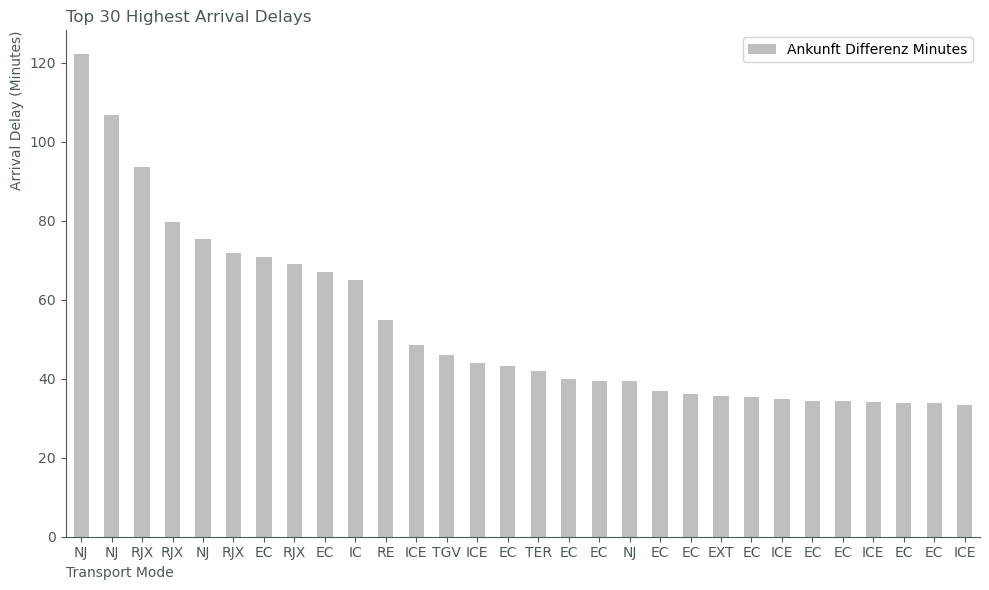

In [21]:
top30_arrival_delays = df.nlargest(30, 'Ankunft Differenz Minutes')
top30_departure_delays = df.nlargest(30, 'Abfahrt Differenz Minutes')

with custom_plot(figsize=(10, 6)) as ax:
    top30_arrival_delays.plot(kind='bar', x='Verkehrsmittel Text', y='Ankunft Differenz Minutes', color=color5, ax=ax)
    ax.set_title('Top 30 Highest Arrival Delays', loc='left', color=color4)
    ax.set_xlabel('Transport Mode', loc='left', color=color4)
    ax.set_ylabel('Arrival Delay (Minutes)', loc='top', color=color4)
    ax.tick_params(axis='x', rotation=0)
    ax.tick_params(axis='y', rotation=0)

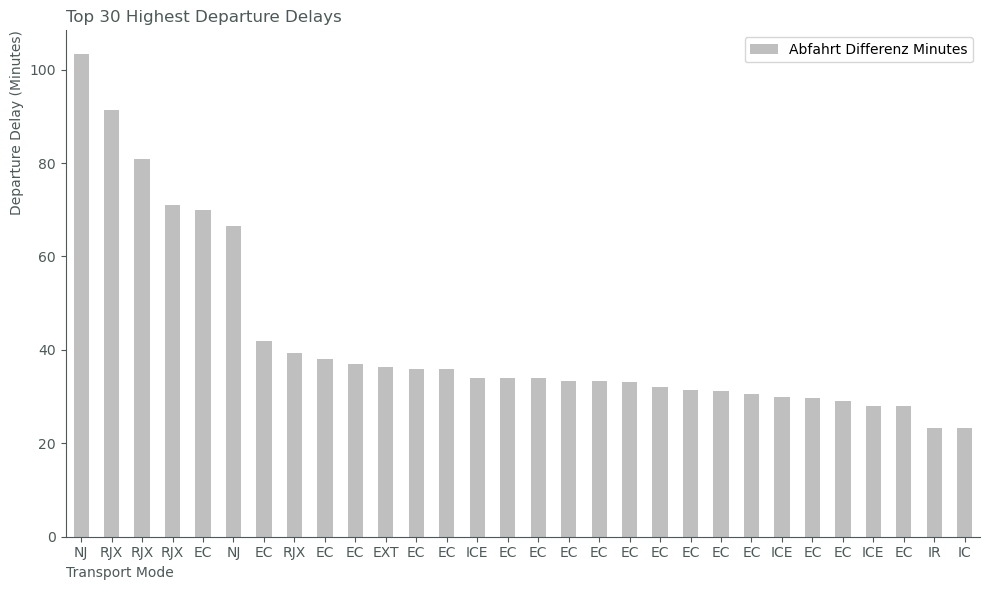

In [22]:
with custom_plot(figsize=(10, 6)) as ax:
    top30_departure_delays.plot(kind='bar', x='Verkehrsmittel Text', y='Abfahrt Differenz Minutes', color=color5, ax=ax)
    ax.set_title('Top 30 Highest Departure Delays', loc='left', color=color4)
    ax.set_xlabel('Transport Mode', loc='left', color=color4)
    ax.set_ylabel('Departure Delay (Minutes)', loc='top', color=color4)
    ax.tick_params(axis='x', rotation=0)
    ax.tick_params(axis='y', rotation=0)

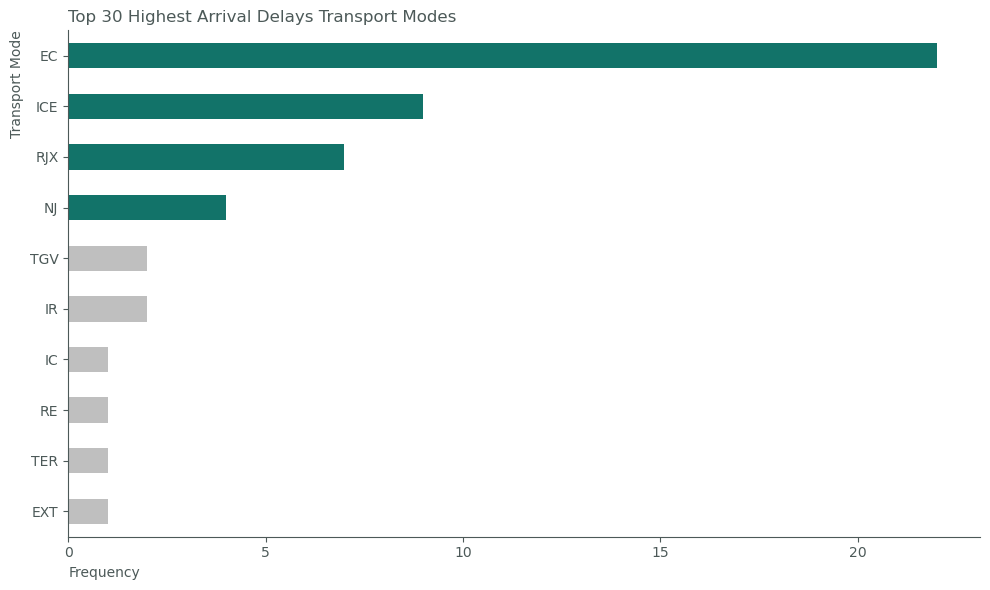

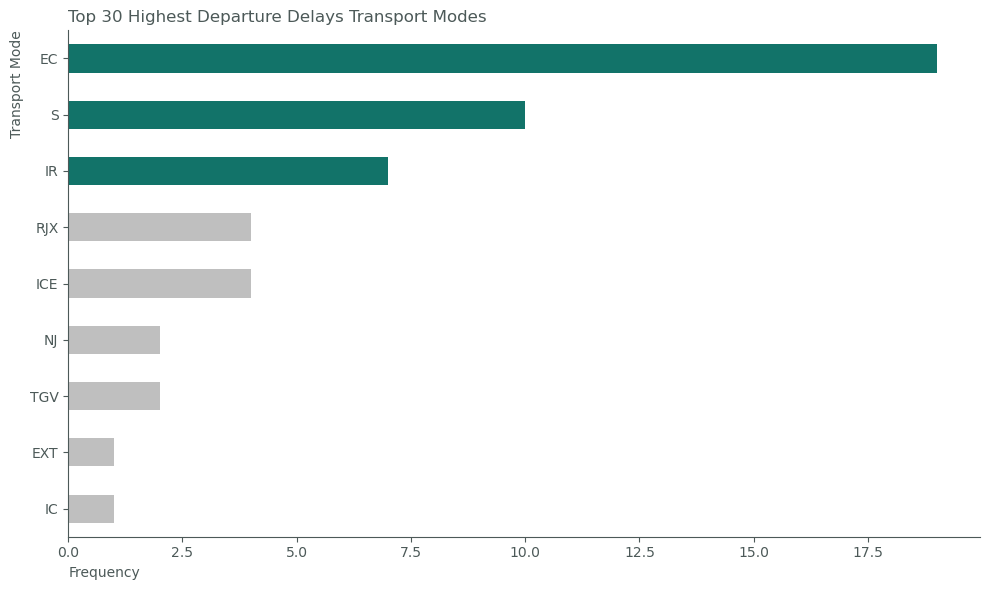

In [23]:
top30_arrival_delays = df.nlargest(50, 'Ankunft Differenz Minutes')
top30_departure_delays = df.nlargest(50, 'Abfahrt Differenz Minutes')

arrival_transport_counts = top30_arrival_delays['Verkehrsmittel Text'].value_counts()
departure_transport_counts = top30_departure_delays['Verkehrsmittel Text'].value_counts()

colors = [color1, color1, color1, color1, color5, color5, color5, color5, color5, color5, color5]
# Plot for Top 30 Highest Arrival Delays' Transport Modes
with custom_plot(figsize=(10, 6)) as ax:
    arrival_transport_counts.plot(kind='barh', color=colors, ax=ax)
    ax.set_title('Top 30 Highest Arrival Delays Transport Modes', loc='left', color=color4)
    ax.set_xlabel('Frequency', loc='left', color=color4)
    ax.set_ylabel('Transport Mode', loc='top', color=color4)
    ax.tick_params(axis='x', rotation=0)
    ax.tick_params(axis='y', rotation=0)
    ax.invert_yaxis()

colors = [color1, color1, color1, color5, color5, color5, color5, color5, color5, color5,]
# Plot for Top 30 Highest Departure Delays' Transport Modes
with custom_plot(figsize=(10, 6)) as ax:
    departure_transport_counts.plot(kind='barh', color=colors, ax=ax)
    ax.set_title('Top 30 Highest Departure Delays Transport Modes', loc='left', color=color4)
    ax.set_xlabel('Frequency', loc='left', color=color4)
    ax.set_ylabel('Transport Mode', loc='top', color=color4)
    ax.tick_params(axis='x', rotation=0)
    ax.tick_params(axis='y', rotation=0)
    ax.invert_yaxis()

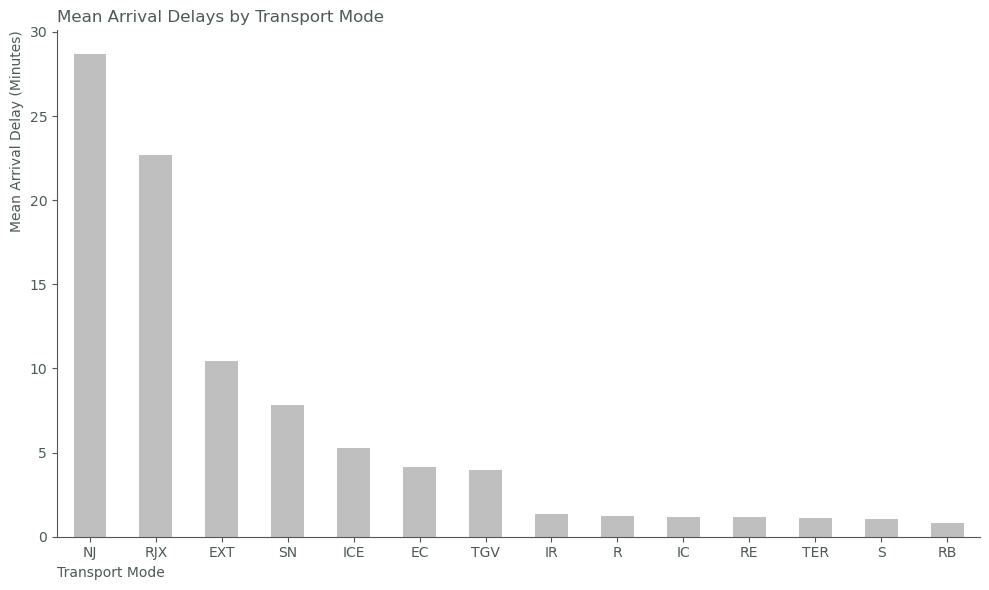

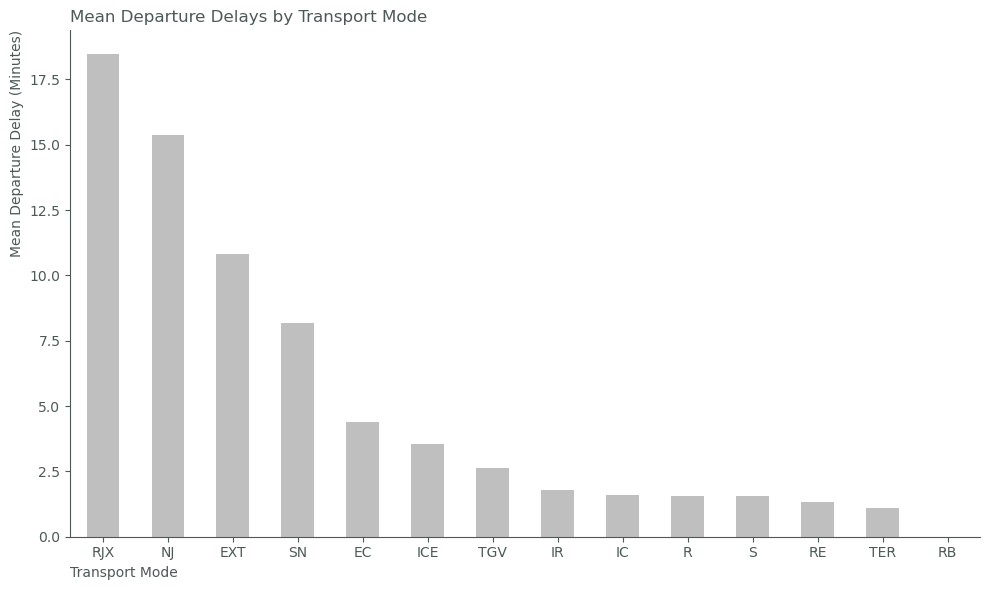

In [24]:
# Define the list of transport modes
transport_modes = ['R', 'IR', 'S', 'RE', 'ICE', 'IC', 'EC', 'EXT', 'TER', 'RJX', 'NJ', 'RB', 'TGV', 'SN', 'ZUG']

filtered_df = df[df['Verkehrsmittel Text'].isin(transport_modes)]

mean_arrival_delays = filtered_df.groupby('Verkehrsmittel Text')['Ankunft Differenz Minutes'].mean().sort_values(ascending=False)
mean_departure_delays = filtered_df.groupby('Verkehrsmittel Text')['Abfahrt Differenz Minutes'].mean().sort_values(ascending=False)
    
# Plot the mean arrival delays
with custom_plot(figsize=(10, 6)) as ax:
    mean_arrival_delays.plot(kind='bar', color=color5, ax=ax)
    ax.set_title('Mean Arrival Delays by Transport Mode', loc='left', color=color4)
    ax.set_xlabel('Transport Mode', loc='left', color=color4)
    ax.set_ylabel('Mean Arrival Delay (Minutes)', loc='top', color=color4)
    ax.tick_params(axis='x', rotation=0)
    ax.tick_params(axis='y', rotation=0)

# Plot the mean departure delays
with custom_plot(figsize=(10, 6)) as ax:
    mean_departure_delays.plot(kind='bar', color=color5, ax=ax)
    ax.set_title('Mean Departure Delays by Transport Mode', loc='left', color=color4)
    ax.set_xlabel('Transport Mode', loc='left', color=color4)
    ax.set_ylabel('Mean Departure Delay (Minutes)', loc='top', color=color4)
    ax.tick_params(axis='x', rotation=0)
    ax.tick_params(axis='y', rotation=0)


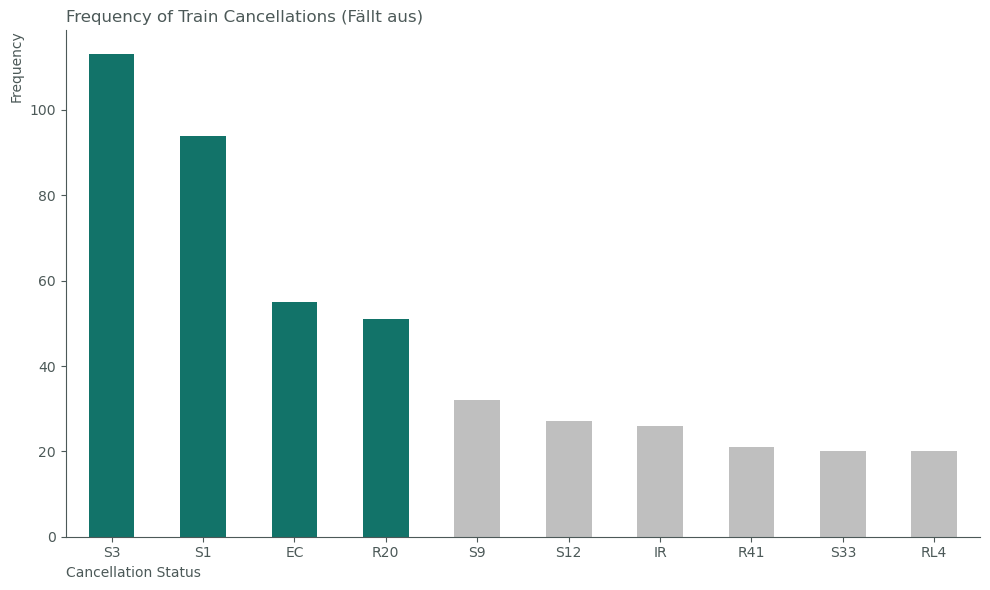

In [25]:
cancellation_counts = df[df['Fällt aus'] == True]['Linien Text'].value_counts().head(10)

colors = [color1, color1, color1, color1, color5, color5, color5, color5, color5, color5]
with custom_plot() as ax:
    cancellation_counts.plot(kind='bar', color=colors, ax=ax)
    ax.set_title('Frequency of Train Cancellations (Fällt aus)', loc='left', color=color4)
    ax.set_xlabel('Cancellation Status', loc='left', color=color4)
    ax.set_ylabel('Frequency', loc='top', color=color4)
    ax.tick_params(axis='x', rotation=0)   

## Delay times

C:\Users\acer\AppData\Local\Temp\ipykernel_11744\469318162.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\acer\AppData\Local\Temp\ipykernel_11744\474935152.py:48: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


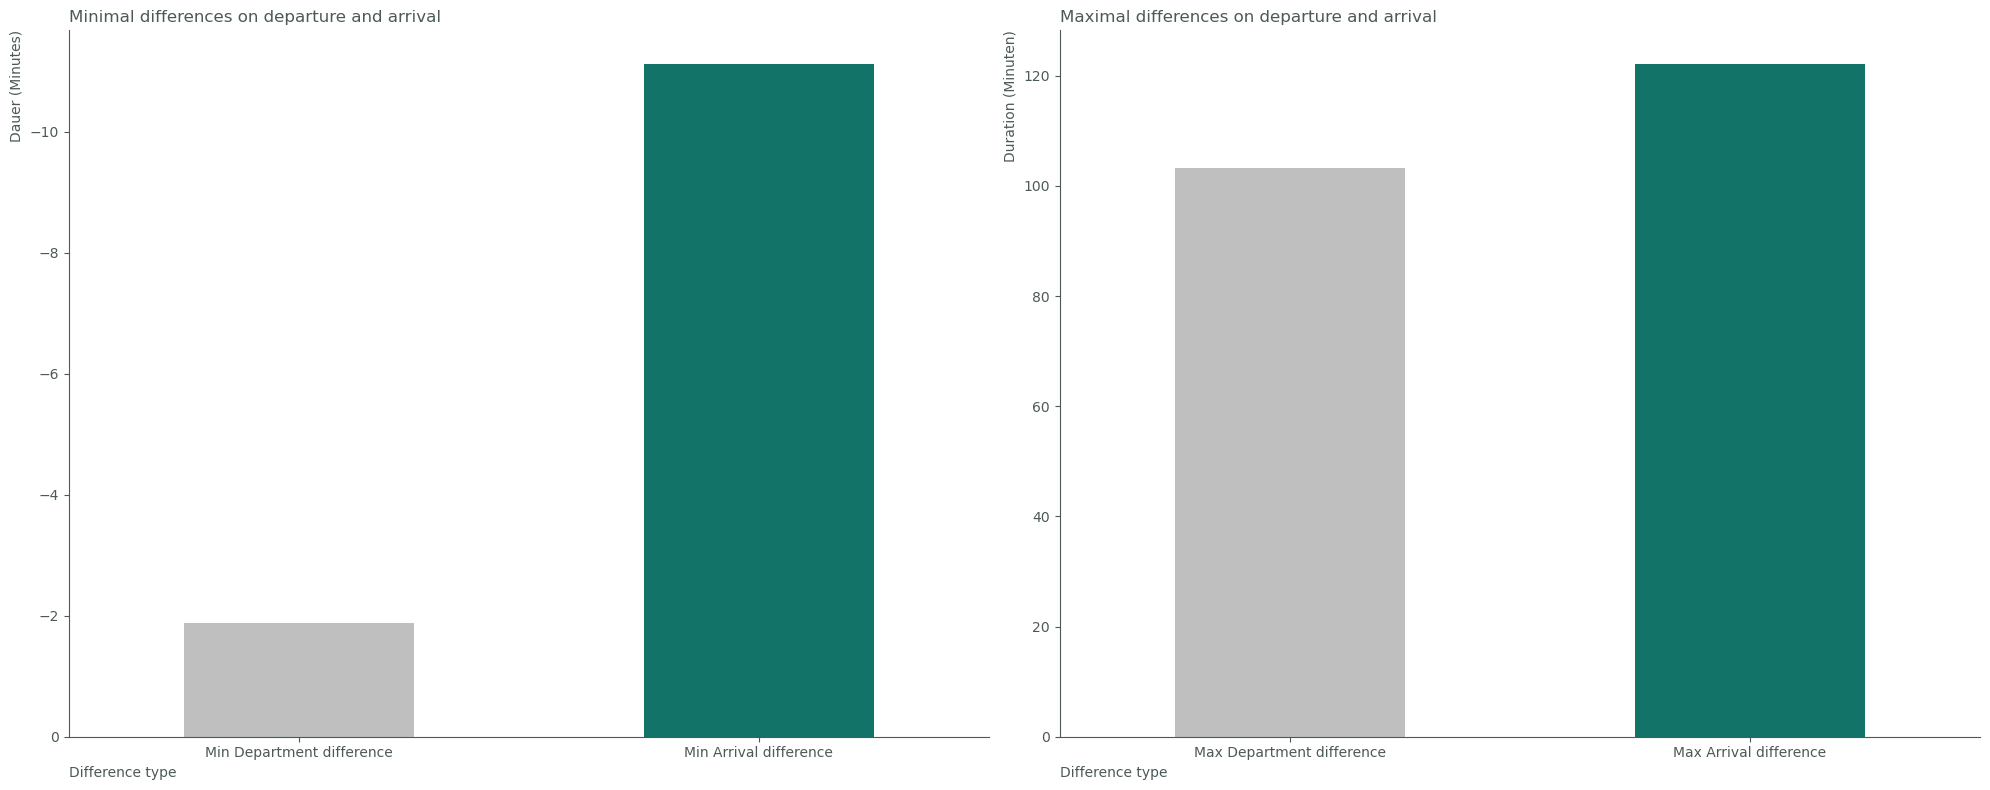

In [26]:
min_abfahrt_diff = df['Abfahrt Differenz'].min()
min_ankunft_diff = df['Ankunft Differenz'].min()
min_abfahrt_diff_minutes = min_abfahrt_diff.total_seconds() / 60
min_ankunft_diff_minutes = min_ankunft_diff.total_seconds() / 60

min_diffs = pd.Series({
    'Min Department difference': min_abfahrt_diff_minutes,
    'Min Arrival difference': min_ankunft_diff_minutes
})

# Calculate the maximum differences in minutes
max_abfahrt_diff_minutes = df['Abfahrt Differenz Minutes'].max()
max_ankunft_diff_minutes = df['Ankunft Differenz Minutes'].max()

max_diffs = pd.Series({
    'Max Department difference': max_abfahrt_diff_minutes,
    'Max Arrival difference': max_ankunft_diff_minutes
})

# Create subplots
fig = plt.figure(figsize=(20, 8))

with custom_subplot(fig, 121) as ax:
    min_diffs.plot(kind='bar', color=[color5, color1], ax=ax)
    ax.set_title('Minimal differences on departure and arrival', loc='left', color=color4)
    ax.set_xlabel('Difference type', loc='left', color=color4)
    ax.set_ylabel('Dauer (Minutes)', loc='top', color=color4)
    ax.tick_params(axis='x', rotation=0, colors=color4)
    ax.tick_params(axis='y', colors=color4)
    ax.spines['bottom'].set_color(color4)
    ax.spines['left'].set_color(color4)
    ax.spines['top'].set_color(color4)
    ax.spines['right'].set_color(color4)
    ax.invert_yaxis()

with custom_subplot(fig, 122) as ax:
    max_diffs.plot(kind='bar', color=[color5, color1], ax=ax)
    ax.set_title('Maximal differences on departure and arrival', loc='left', color=color4)
    ax.set_xlabel('Difference type', loc='left', color=color4)
    ax.set_ylabel('Duration (Minuten)', loc='top', color=color4)
    ax.tick_params(axis='x', rotation=0, colors=color4)
    ax.tick_params(axis='y', colors=color4)
    ax.spines['bottom'].set_color(color4)
    ax.spines['left'].set_color(color4)
    ax.spines['top'].set_color(color4)
    ax.spines['right'].set_color(color4)

plt.tight_layout()
plt.show()


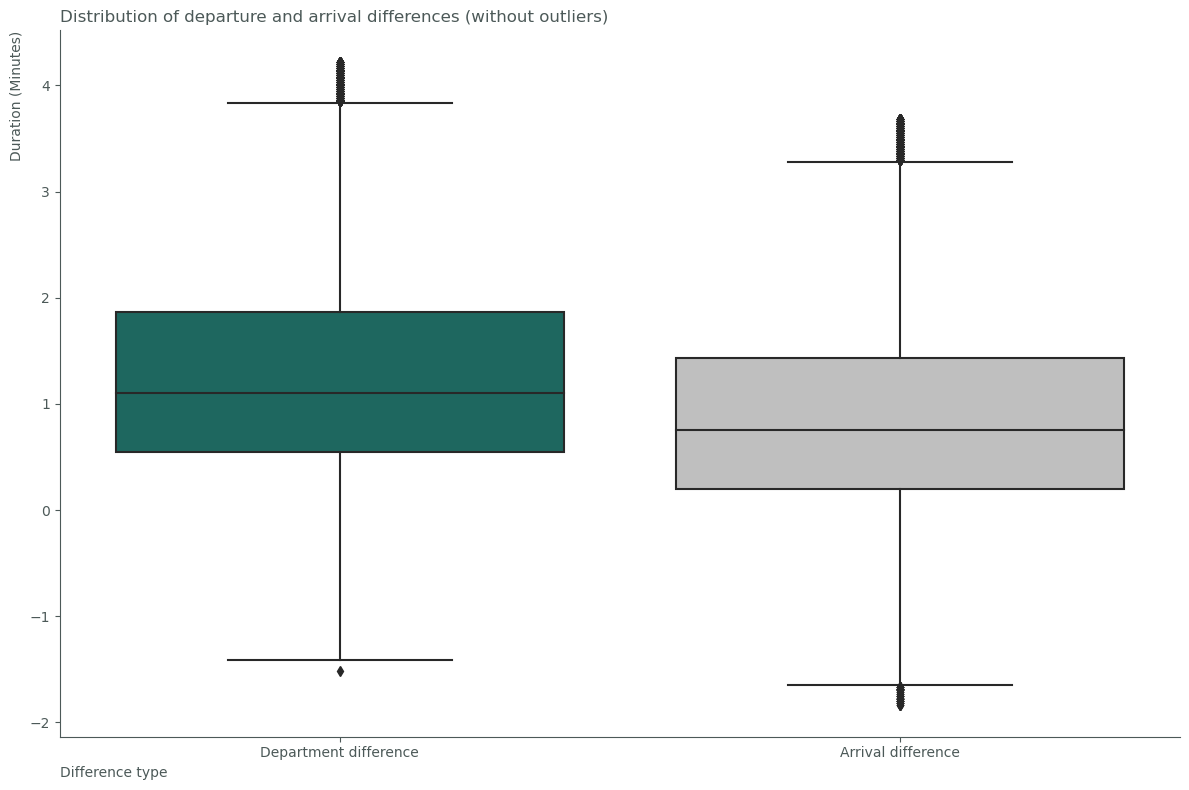

In [27]:
# Exclusion of outliers: Values within 1.5*IQR
q1_abfahrt = df['Abfahrt Differenz Minutes'].quantile(0.25)
q3_abfahrt = df['Abfahrt Differenz Minutes'].quantile(0.75)
iqr_abfahrt = q3_abfahrt - q1_abfahrt
df_abfahrt_filtered = df[(df['Abfahrt Differenz Minutes'] >= (q1_abfahrt - 1.5 * iqr_abfahrt)) & 
                         (df['Abfahrt Differenz Minutes'] <= (q3_abfahrt + 1.5 * iqr_abfahrt))]

q1_ankunft = df['Ankunft Differenz Minutes'].quantile(0.25)
q3_ankunft = df['Ankunft Differenz Minutes'].quantile(0.75)
iqr_ankunft = q3_ankunft - q1_ankunft
df_ankunft_filtered = df[(df['Ankunft Differenz Minutes'] >= (q1_ankunft - 1.5 * iqr_ankunft)) & 
                         (df['Ankunft Differenz Minutes'] <= (q3_ankunft + 1.5 * iqr_ankunft))]

with custom_plot(figsize=(12, 8)) as ax:
    sns.boxplot(data=[df_abfahrt_filtered['Abfahrt Differenz Minutes'], df_ankunft_filtered['Ankunft Differenz Minutes']], ax=ax, palette=[color1, color5])
    ax.set_title('Distribution of departure and arrival differences (without outliers)', loc='left', color=color4)
    ax.set_xlabel('Difference type', loc='left', color=color4)
    ax.set_ylabel('Duration (Minutes)', loc='top', color=color4)
    ax.tick_params(axis='x', rotation=0)
    ax.set_xticklabels(['Department difference', 'Arrival difference'], color=color4)

In [28]:
df_clean = df.dropna(subset=['Lat', 'Lon', 'Abfahrt Differenz Minutes', 'Ankunft Differenz Minutes']).copy()

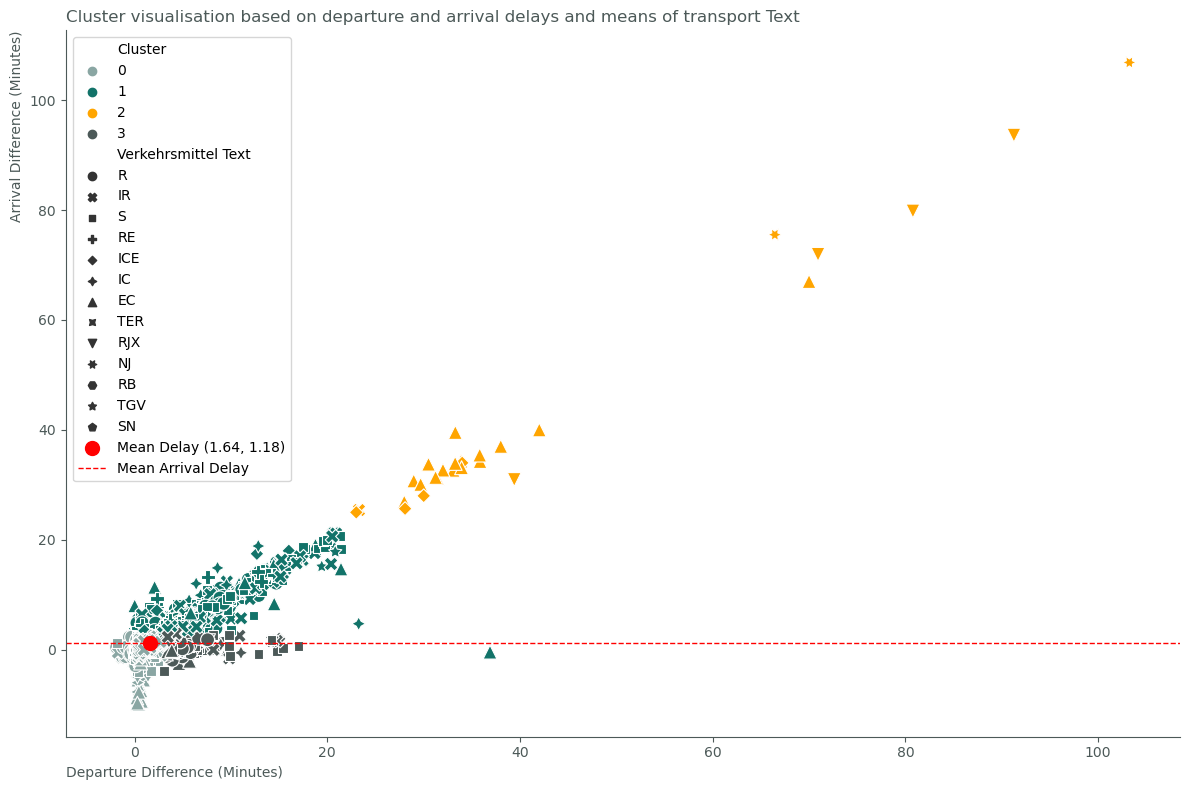

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df_cluster = df_clean.copy()

# Conversion of the booleans into numerical values
df_cluster['Ankunftsverspätung'] = df_cluster['Ankunftsverspätung'].astype(int)
df_cluster['Abfahrtsverspätung'] = df_cluster['Abfahrtsverspätung'].astype(int)
df_cluster['Fällt aus'] = df_cluster['Fällt aus'].astype(int)

# Select columns
cluster_columns = ['Abfahrt Differenz Minutes', 'Ankunft Differenz Minutes', 'Ankunftsverspätung', 'Abfahrtsverspätung', 'Fällt aus']
data_for_clustering = df_cluster[cluster_columns]

# Scaling the data
scaler = StandardScaler()
scaled_cluster_data = scaler.fit_transform(data_for_clustering)

# Determine the optimum number of clusters using the Elbow method
sse_cluster = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_cluster_data)
    sse_cluster.append(kmeans.inertia_)

# Using the Context Manager to plot the SSE values to determine the optimum number of clusters
# with custom_plot(figsize=(10, 6)) as ax:
#     ax.plot(range(1, 11), sse_cluster, marker='o', color='orange')
#     ax.set_xlabel('Anzahl der Cluster', loc='left', color=color4)
#     ax.set_ylabel('Summe der quadrierten Abweichungen (SSE)', loc='top', color=color4)
#     ax.set_title('Elbow-Methode zur Bestimmung der optimalen Anzahl von Clustern', loc='left', color=color4)

# The Elbow method shows that 4 clusters are optimal
optimal_cluster_count = 4

# Application of K-Means
kmeans = KMeans(n_clusters=optimal_cluster_count, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(scaled_cluster_data)

# Calculation of the average departure and arrival delay
mean_abfahrt_cluster = df_cluster['Abfahrt Differenz Minutes'].mean()
mean_ankunft_cluster = df_cluster['Ankunft Differenz Minutes'].mean()


with custom_plot(figsize=(12, 8)) as ax:
    sns.scatterplot(data=df_cluster, x='Abfahrt Differenz Minutes', y='Ankunft Differenz Minutes', hue='Cluster', style='Verkehrsmittel Text', palette=[color3, color1, 'orange', color4], s=100, ax=ax)
    ax.set_title('Cluster visualisation based on departure and arrival delays and means of transport Text', loc='left', color=color4)
    ax.set_xlabel('Departure Difference (Minutes)', loc='left', color=color4)
    ax.set_ylabel('Arrival Difference (Minutes)', loc='top', color=color4)
    
    # Plot of the mean value point
    ax.scatter(mean_abfahrt_cluster, mean_ankunft_cluster, color='red', s=400, marker='.', label=f'Mean Delay ({mean_abfahrt_cluster:.2f}, {mean_ankunft_cluster:.2f})')
    
    # Plot of the mean arrival delay line
    ax.axhline(mean_ankunft_cluster, color='red', linestyle='--', linewidth=1, label='Mean Arrival Delay')
    
    ax.legend()

# Save cluster
df['Cluster'] = df_cluster['Cluster']

In [30]:
clusters = df_cluster['Cluster'].unique()
cluster_dfs = {cluster: df_cluster[df_cluster['Cluster'] == cluster] for cluster in clusters}

# cluster_stats = {}
# for cluster, df in cluster_dfs.items():
#     stats = df.describe() 
#     cluster_stats[cluster] = stats
#     print(f"Statistiken für Cluster {cluster}:\n", stats)

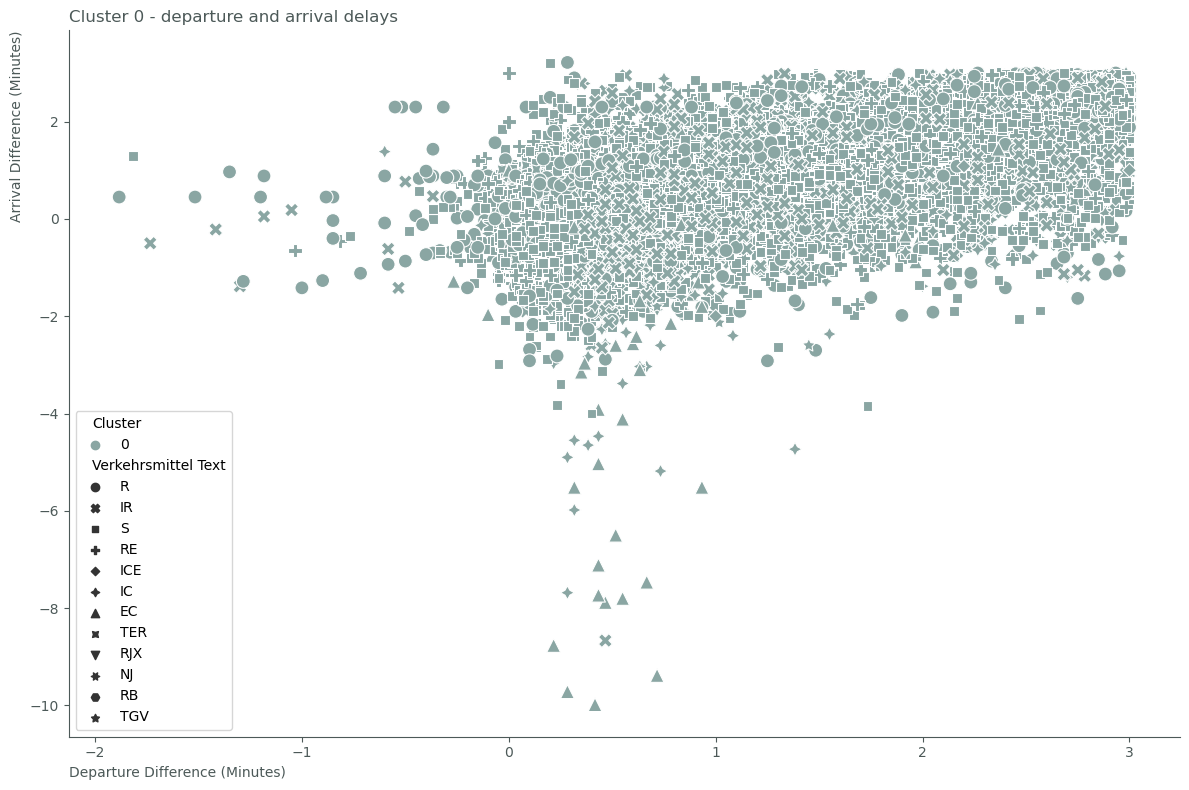

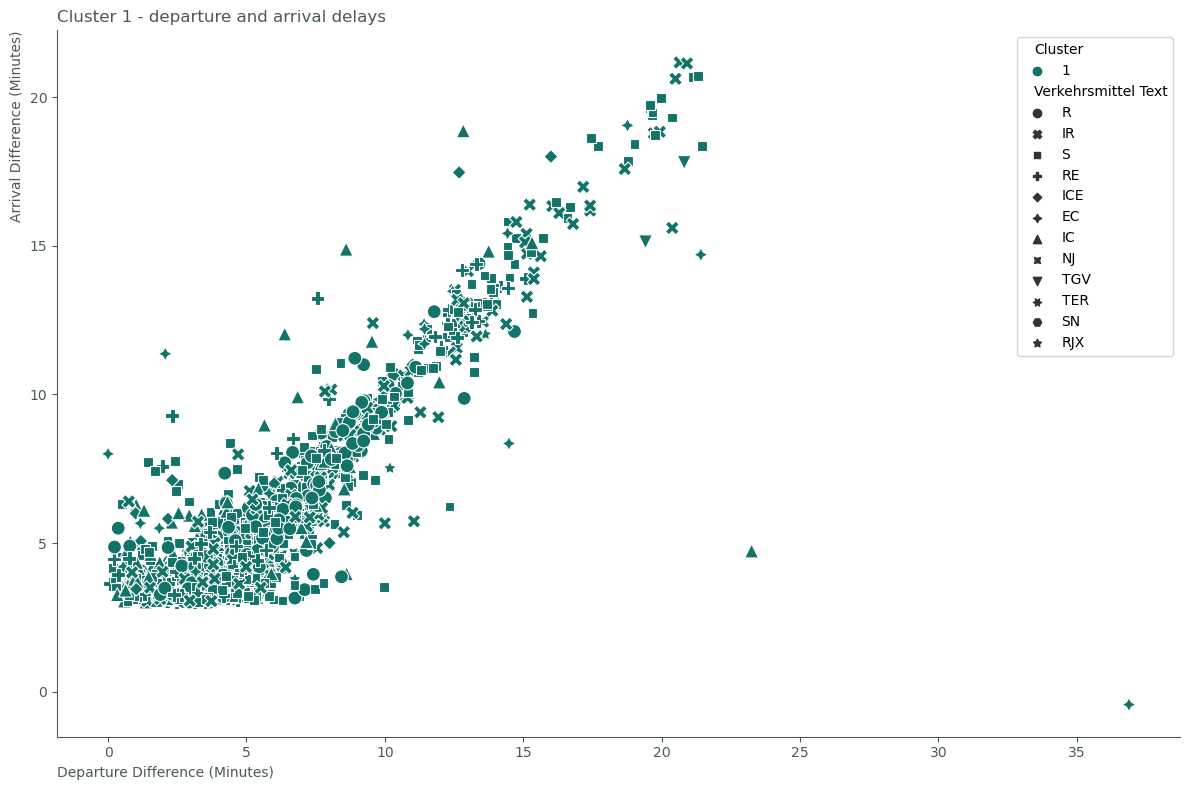

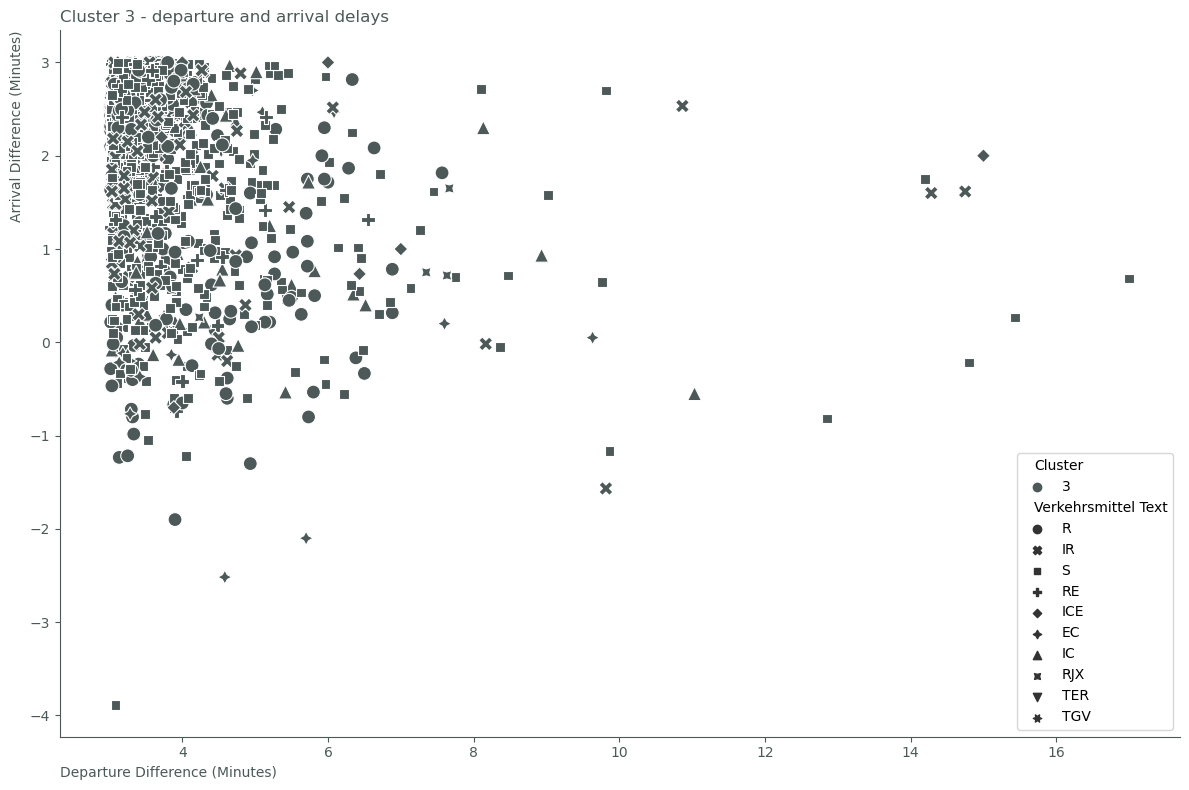

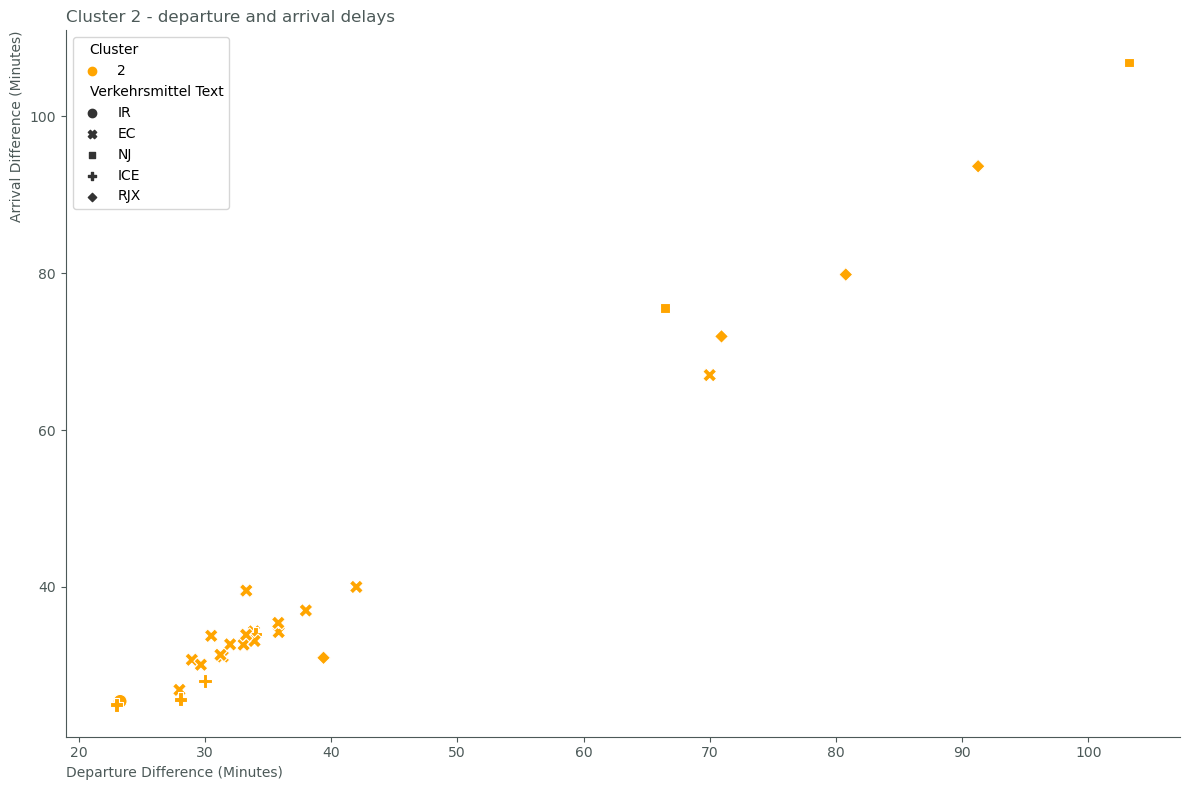

In [31]:
cluster_df = df_clean.copy()

palette = [color3, color1, 'orange', color4]
for cluster, cluster_df in cluster_dfs.items():
    with custom_plot(figsize=(12, 8)) as ax:
        sns.scatterplot(
            data=cluster_df, 
            x='Abfahrt Differenz Minutes', 
            y='Ankunft Differenz Minutes', 
            hue='Cluster', 
            style='Verkehrsmittel Text', 
            palette=[palette[cluster]], 
            s=100, 
            ax=ax
        )
        ax.set_title(f'Cluster {cluster} - departure and arrival delays', loc='left', color=color4)
        ax.set_xlabel('Departure Difference (Minutes)', loc='left', color=color4)
        ax.set_ylabel('Arrival Difference (Minutes)', loc='top', color=color4)

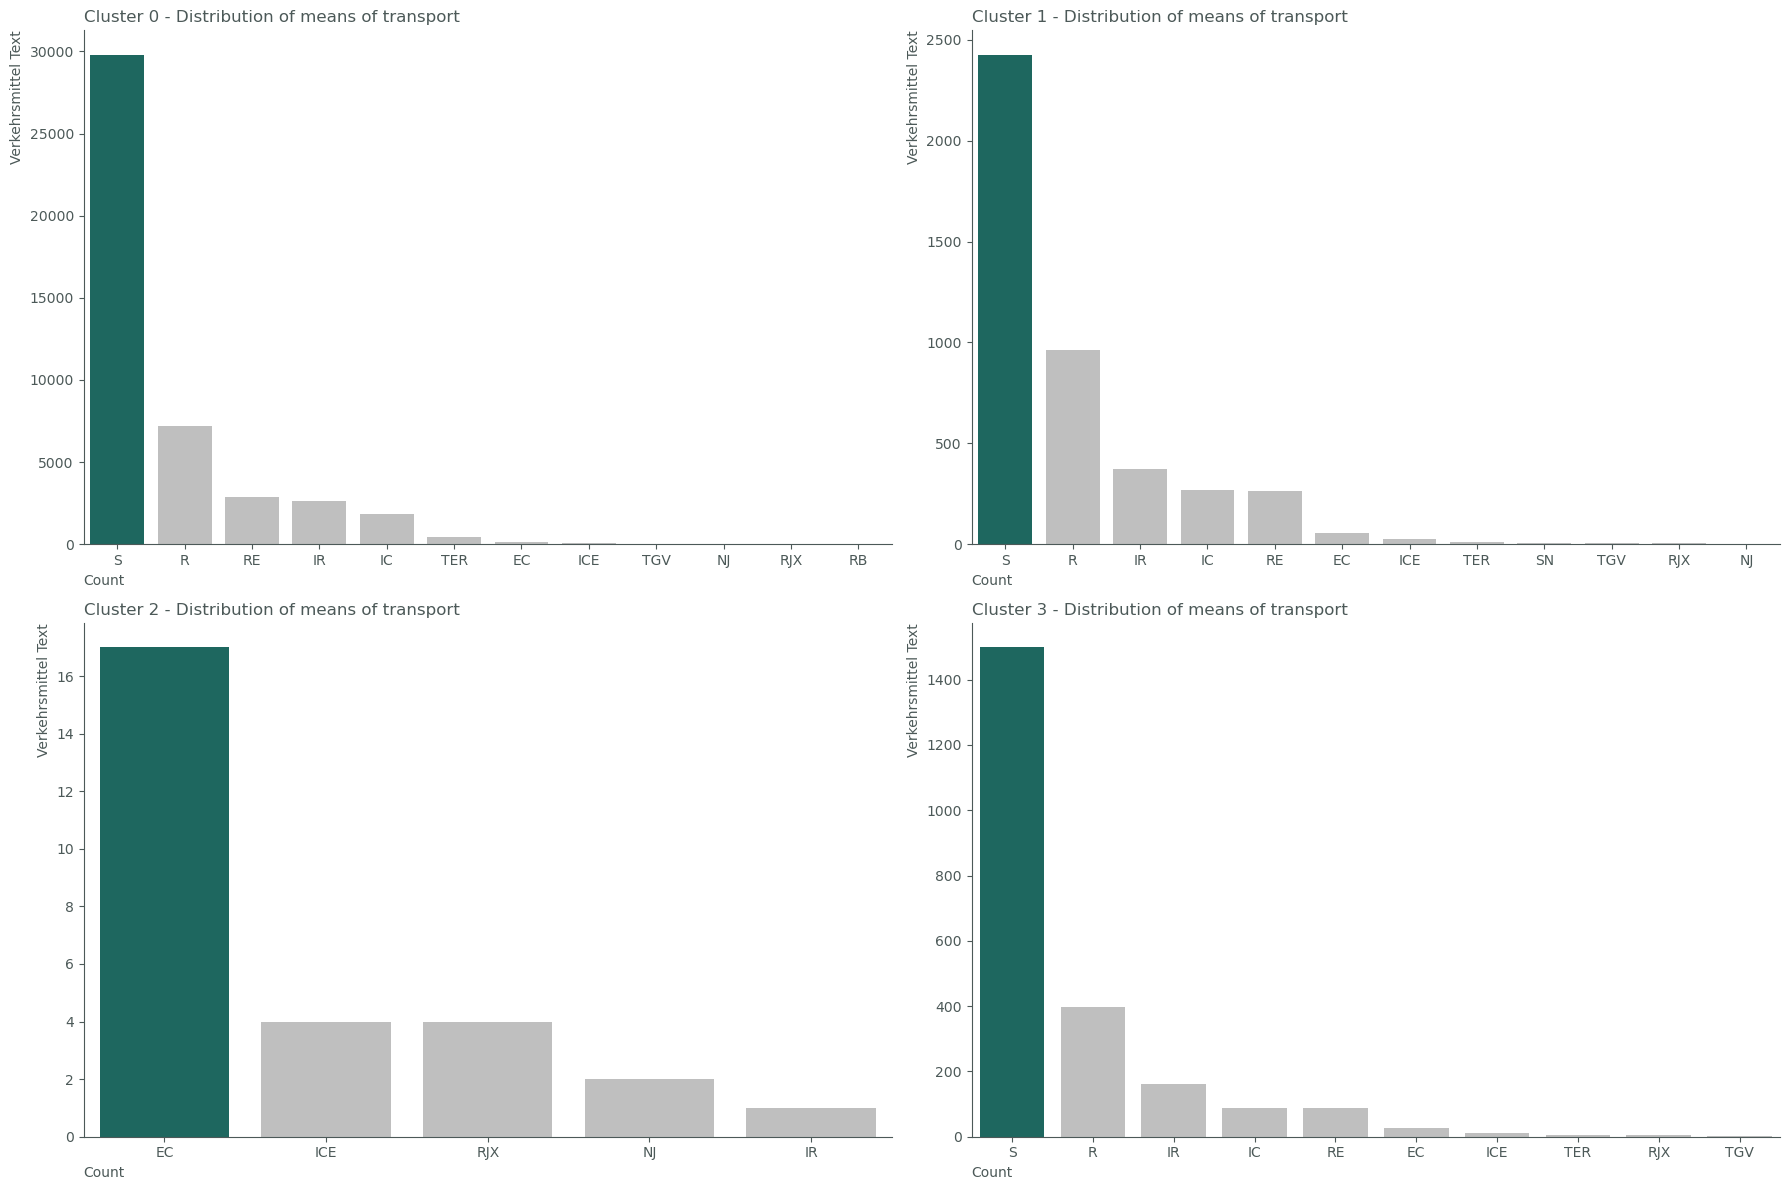

In [32]:
df_copy = df.copy()

sorted_clusters = sorted(cluster_dfs.items(), key=lambda x: x[0])
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

for idx, (cluster, cluster_df) in enumerate(sorted_clusters):
    ax = axes[idx // 2, idx % 2]
    transport_counts = cluster_df['Verkehrsmittel Text'].value_counts().sort_values(ascending=False)
    colors = [color1] + [color5] * (len(transport_counts) - 1)
    sns.barplot(y=transport_counts.values, x=transport_counts.index, palette=colors, ax=ax)
    ax.set_title(f'Cluster {cluster} - Distribution of means of transport', loc='left', color=color4)
    ax.set_xlabel('Count', loc='left', color=color4)
    ax.set_ylabel('Verkehrsmittel Text', loc='top', color=color4)
    ax.tick_params(axis='x', colors=color4)
    ax.tick_params(axis='y', colors=color4)
    ax.spines['bottom'].set_color(color4)
    ax.spines['left'].set_color(color4)
    sns.despine(ax=ax)

plt.tight_layout()
plt.show()

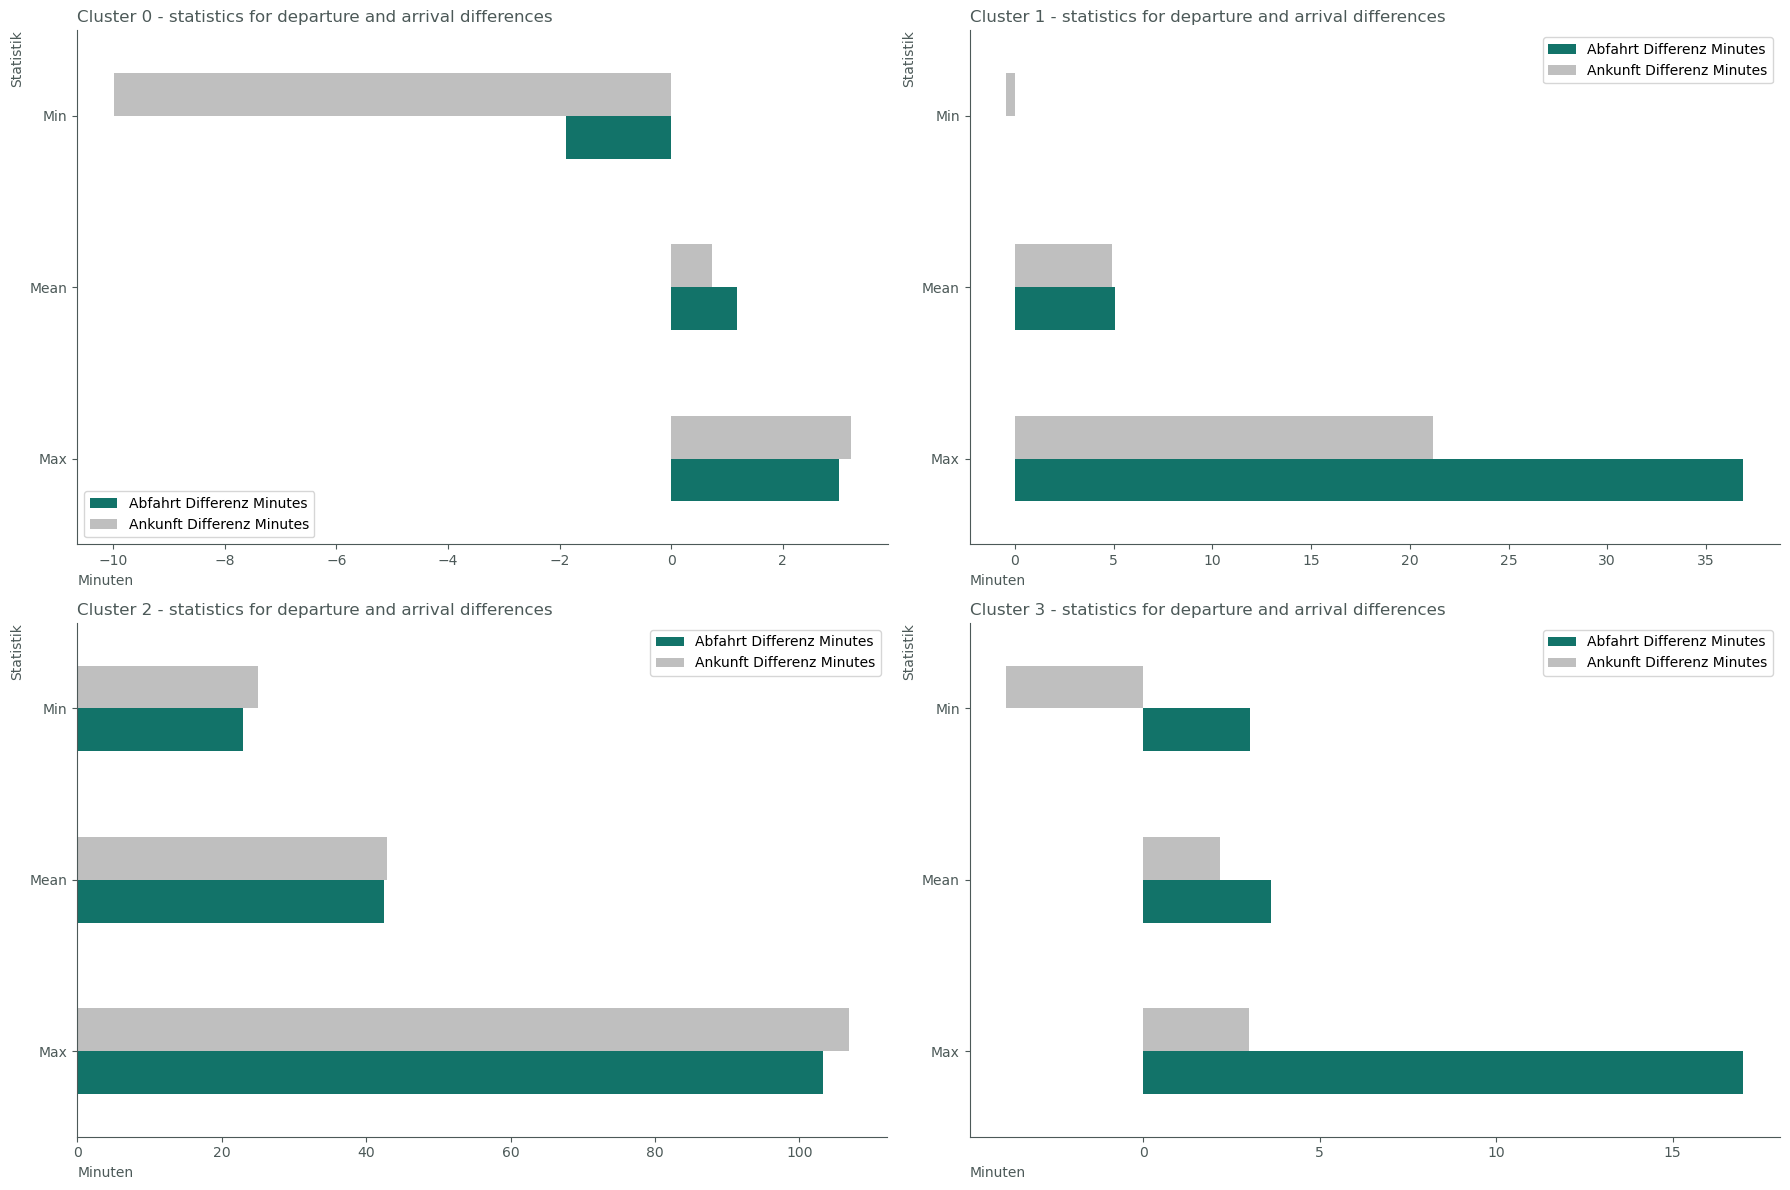

In [33]:
df_copy = df.copy()

stats_list = []

for cluster, cluster_df in cluster_dfs.items():
    min_values = cluster_df[['Abfahrt Differenz Minutes', 'Ankunft Differenz Minutes']].min()
    mean_values = cluster_df[['Abfahrt Differenz Minutes', 'Ankunft Differenz Minutes']].mean()
    max_values = cluster_df[['Abfahrt Differenz Minutes', 'Ankunft Differenz Minutes']].max()
    
    stats_list.append({
        'Cluster': cluster, 
        'Statistik': 'Min', 
        'Abfahrt Differenz Minutes': min_values['Abfahrt Differenz Minutes'], 
        'Ankunft Differenz Minutes': min_values['Ankunft Differenz Minutes']
    })
    stats_list.append({
        'Cluster': cluster, 
        'Statistik': 'Mean', 
        'Abfahrt Differenz Minutes': mean_values['Abfahrt Differenz Minutes'], 
        'Ankunft Differenz Minutes': mean_values['Ankunft Differenz Minutes']
    })
    stats_list.append({
        'Cluster': cluster, 
        'Statistik': 'Max', 
        'Abfahrt Differenz Minutes': max_values['Abfahrt Differenz Minutes'], 
        'Ankunft Differenz Minutes': max_values['Ankunft Differenz Minutes']
    })

stats_df = pd.DataFrame(stats_list)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

sorted_clusters = sorted(clusters)

for idx, cluster in enumerate(sorted_clusters):
    ax = axes[idx // 2, idx % 2]
    cluster_stats = stats_df[stats_df['Cluster'] == cluster]
    # Sorting the values within the plot from large to small
    cluster_stats = cluster_stats.sort_values(by=['Abfahrt Differenz Minutes', 'Ankunft Differenz Minutes'], ascending=False)
    cluster_stats.set_index('Statistik')[['Abfahrt Differenz Minutes', 'Ankunft Differenz Minutes']].plot(kind='barh', ax=ax, color=[color1, color5])  # Axis flipped
    ax.set_title(f'Cluster {cluster} - statistics for departure and arrival differences', loc='left', color=color4)
    ax.set_ylabel('Statistik', loc='top', color=color4)
    ax.set_xlabel('Minuten', loc='left', color=color4)
    ax.tick_params(axis='x', colors=color4)
    ax.tick_params(axis='y', colors=color4)
    ax.spines['bottom'].set_color(color4)
    ax.spines['left'].set_color(color4)
    sns.despine(ax=ax)

plt.tight_layout()
plt.show()


# Early Arrival/Department

In [34]:
# Filter the DataFrame for rows where 'Abfahrt Differenz Minutes' or 'Ankunft Differenz Minutes' is less than 0
df_minus_department = df[(df['Abfahrt Differenz Minutes'] < 0)]
# df_minus_department['Abfahrt Differenz Minutes'].describe()
# df_minus_department

# for column in df_minus_department.columns:
#     print(f'Value counts for {column}')
#     print(df_minus_department[column].value_counts())
#     print(df_minus_department[column].describe())

C:\Users\acer\AppData\Local\Temp\ipykernel_11744\469318162.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\acer\AppData\Local\Temp\ipykernel_11744\469318162.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\acer\AppData\Local\Temp\ipykernel_11744\469318162.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\acer\AppData\Local\Temp\ipykernel_11744\469318162.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\acer\AppData\Local\Temp\ipykernel_11744\469318162.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\acer\AppData\Local\Temp\ipykernel_11744\1645860806.py:31: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


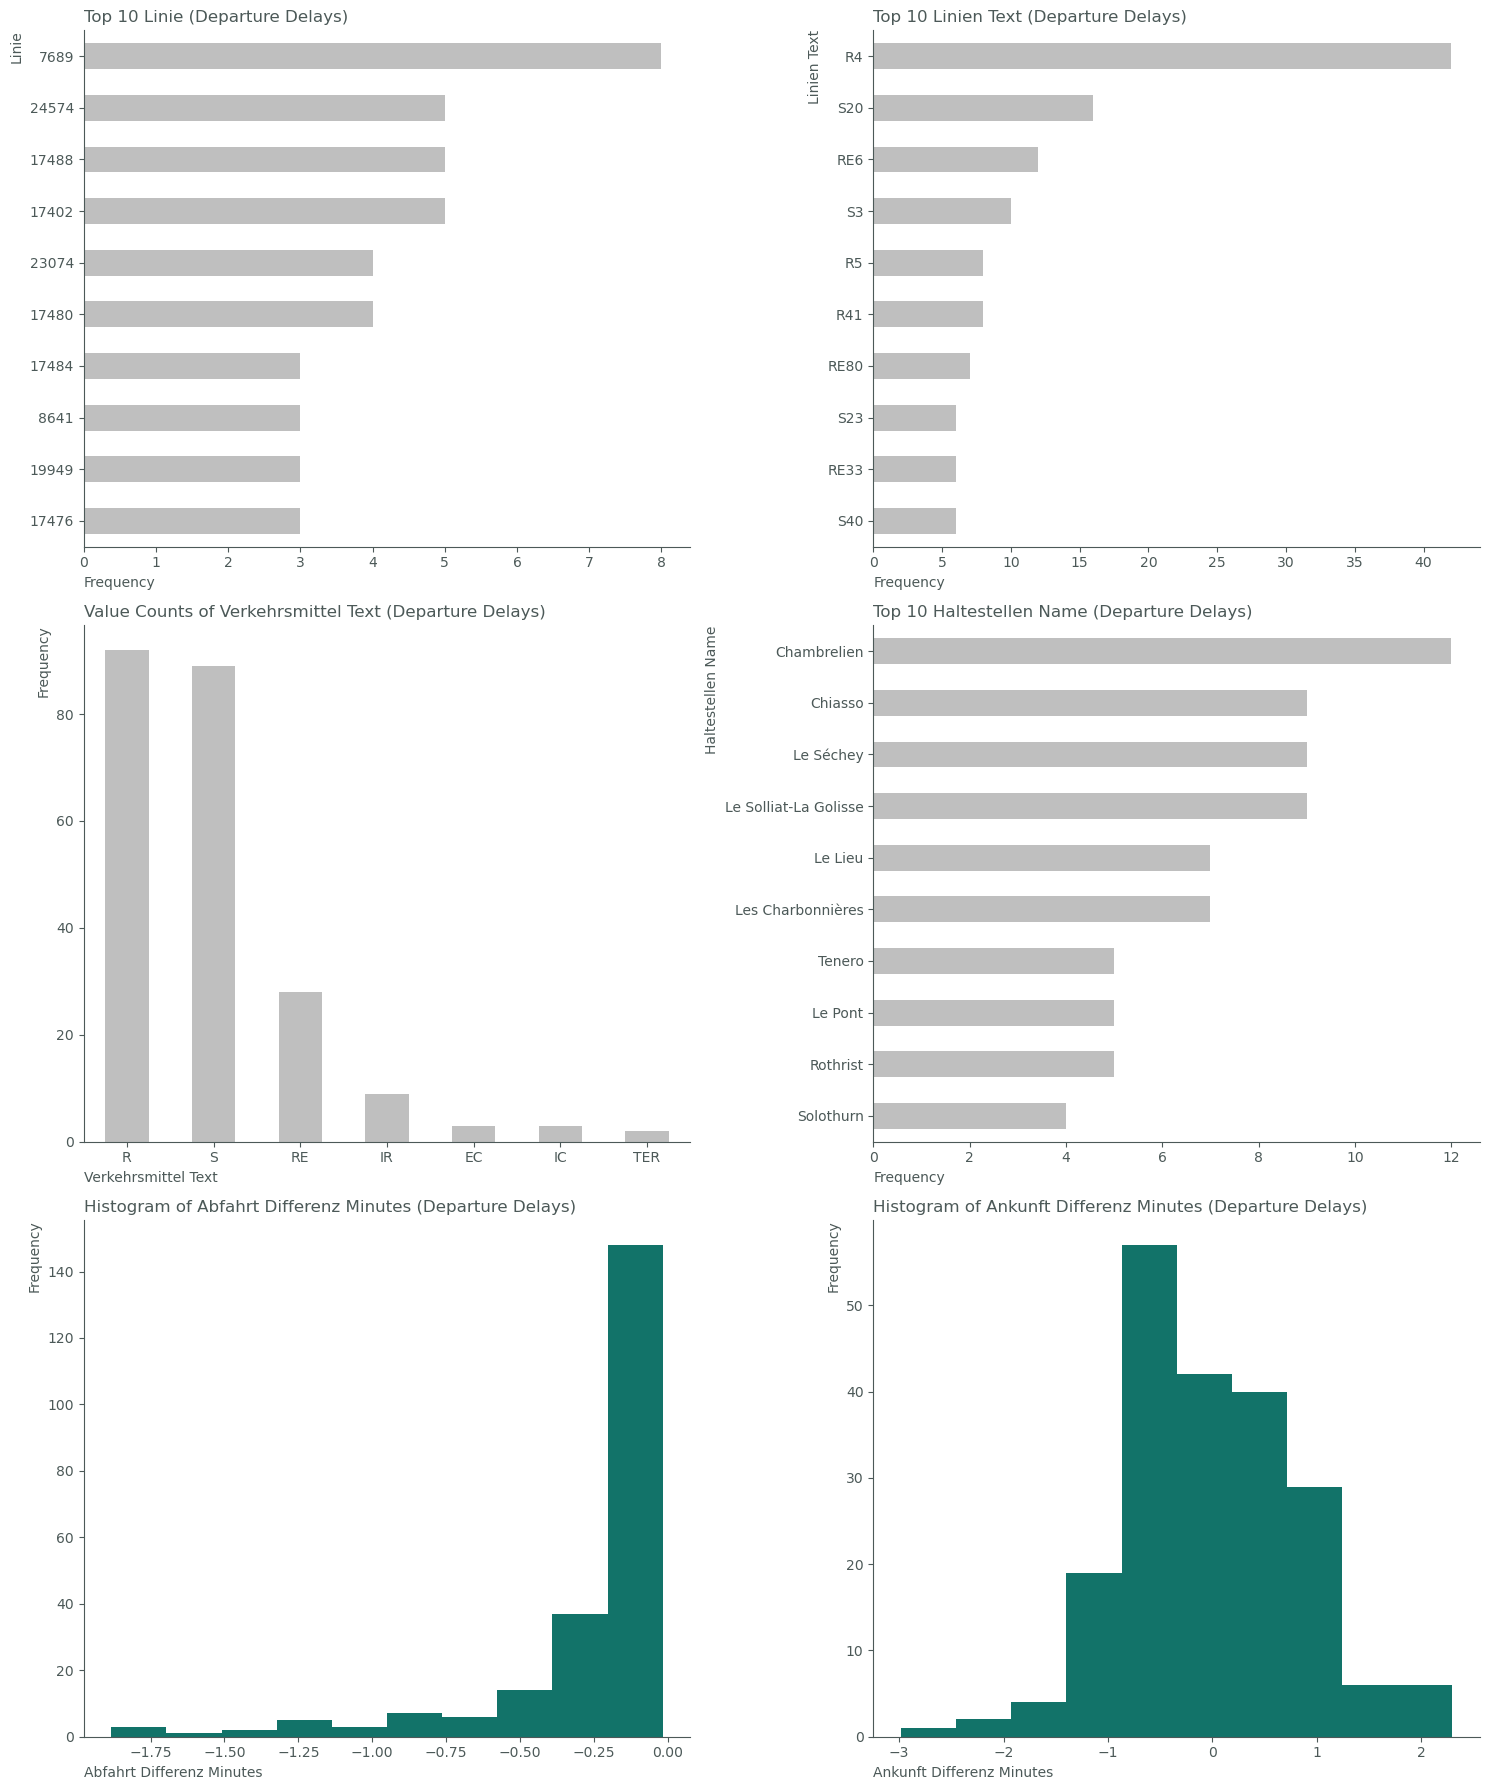

In [35]:
columns_to_plot = ['Linie', 'Linien Text', 'Verkehrsmittel Text', 'Haltestellen Name', 'Abfahrt Differenz Minutes', 'Ankunft Differenz Minutes']

fig = plt.figure(figsize=(15, 18))

for i, column in enumerate(columns_to_plot):
    if column in df_minus_department.columns:
        with custom_subplot(fig, 321 + i) as ax:  # 321 means 3 rows, 2 columns, 1-based index
            if column in ['Linie', 'Linien Text', 'Haltestellen Name']:
                # Select only the top 10 values and invert the x and y axes
                top10 = df_minus_department[column].value_counts().head(10)
                top10.plot(kind='barh', ax=ax, color=color5)
                ax.set_title(f'Top 10 {column} (Departure Delays)', loc='left', color=color4)
                ax.set_xlabel('Frequency', loc='left', color=color4)
                ax.set_ylabel(column, loc='top', color=color4)
                ax.invert_yaxis()
            elif df_minus_department[column].dtype == 'object':
                # Plot for categorical data
                df_minus_department[column].value_counts().plot(kind='bar', ax=ax, color=color5)
                ax.set_title(f'Value Counts of {column} (Departure Delays)', loc='left', color=color4)
                ax.set_xlabel(column, loc='left', color=color4)
                ax.set_ylabel('Frequency', loc='top', color=color4)
            else:
                # Plot for numerical data
                df_minus_department[column].plot(kind='hist', ax=ax, color=color1)
                ax.set_title(f'Histogram of {column} (Departure Delays)', loc='left', color=color4)
                ax.set_xlabel(column, loc='left', color=color4)
                ax.set_ylabel('Frequency', loc='top', color=color4)
            ax.tick_params(axis='x', rotation=0, color=color4)
            ax.tick_params(axis='y', color=color4)

plt.tight_layout()
plt.show()


In [36]:
df_minus_arrival = df[df['Ankunft Differenz Minutes'] < 0]
# df_minus_arrival['Ankunft Differenz Minutes'].describe()
# df_minus_arrival

# for column in df_minus_arrival.columns:
#     print(f'Value counts for {column}')
#     print(df_minus_arrival[column].value_counts())
#     print(df_minus_arrival[column].describe())

C:\Users\acer\AppData\Local\Temp\ipykernel_11744\469318162.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\acer\AppData\Local\Temp\ipykernel_11744\469318162.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\acer\AppData\Local\Temp\ipykernel_11744\469318162.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\acer\AppData\Local\Temp\ipykernel_11744\469318162.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\acer\AppData\Local\Temp\ipykernel_11744\469318162.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\acer\AppData\Local\Temp\ipykernel_11744\2004860149.py:29: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


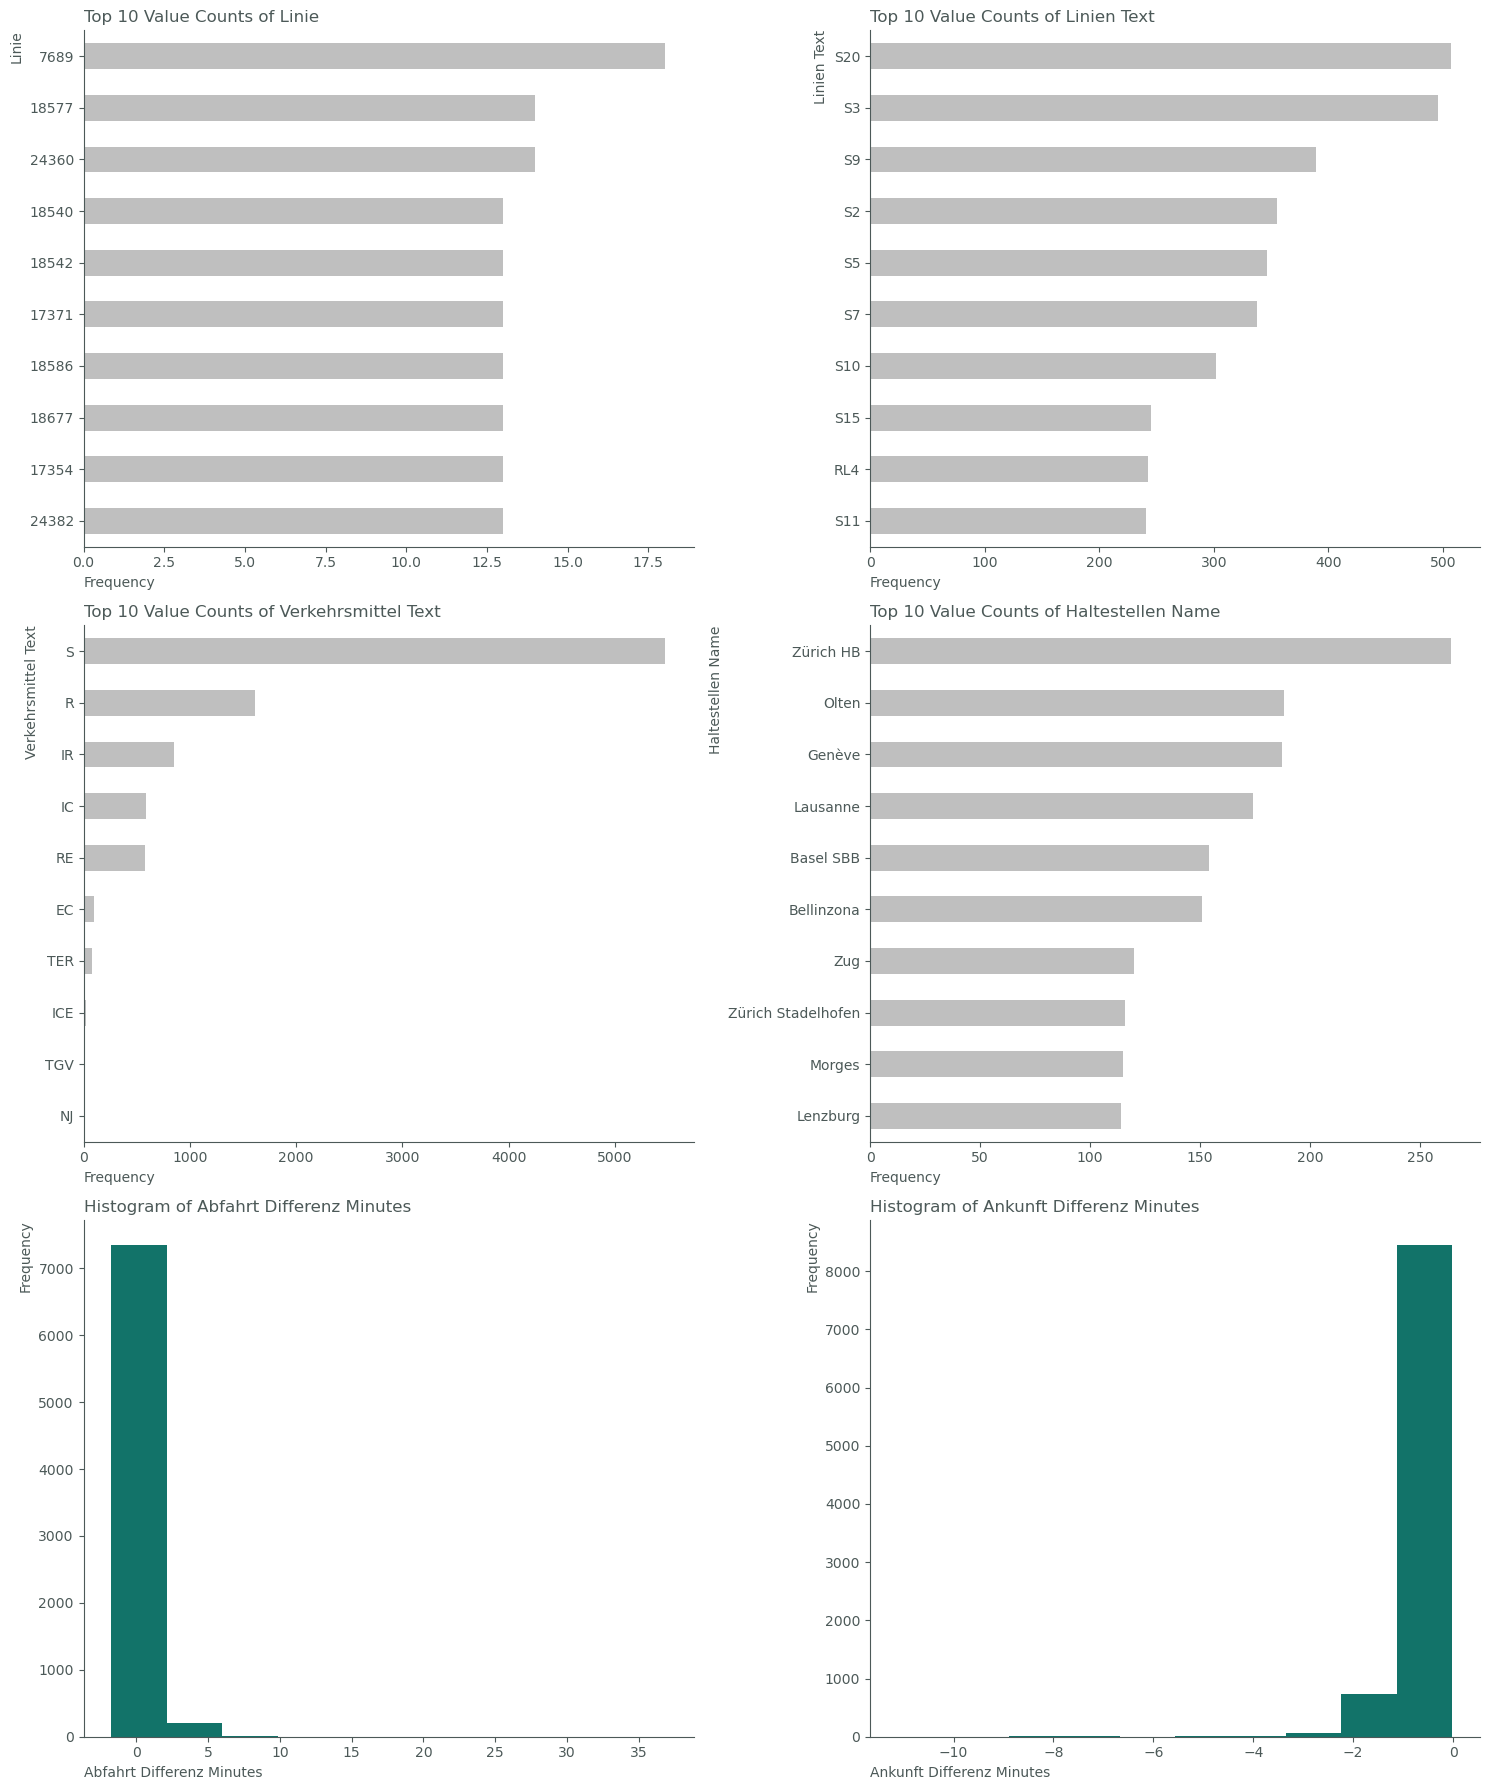

In [37]:
# Erstellen der Subplots
fig = plt.figure(figsize=(15, 18))

# Iteriere über die zu plottenden Spalten
for i, column in enumerate(columns_to_plot):
    if column in df_minus_arrival.columns:
        with custom_subplot(fig, 321 + i) as ax:  # 321 means 3 rows, 2 columns, 1-based index
            if df_minus_arrival[column].dtype == 'object':
                # Nur die Top 10 Werte auswählen
                top_values = df_minus_arrival[column].value_counts().head(10)
                # Plot für kategoriale Daten mit gedrehten Achsen
                top_values.plot(kind='barh', ax=ax, color=color5)
                ax.set_title(f'Top 10 Value Counts of {column}', loc='left', color=color4)
                ax.set_xlabel('Frequency', loc='left', color=color4)
                ax.set_ylabel(column, loc='top', color=color4)
                ax.tick_params(axis='x', color=color4)
                ax.tick_params(axis='y', rotation=0, color=color4)
                ax.invert_yaxis()
            else:
                # Plot für numerische Daten
                df_minus_arrival[column].plot(kind='hist', ax=ax, color=color1)
                ax.set_title(f'Histogram of {column}', loc='left', color=color4)
                ax.set_xlabel(column, loc='left', color=color4)
                ax.set_ylabel('Frequency', loc='top', color=color4)
                ax.tick_params(axis='x', rotation=0, color=color4)
                ax.tick_params(axis='y', color=color4)

# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()


## Correlation

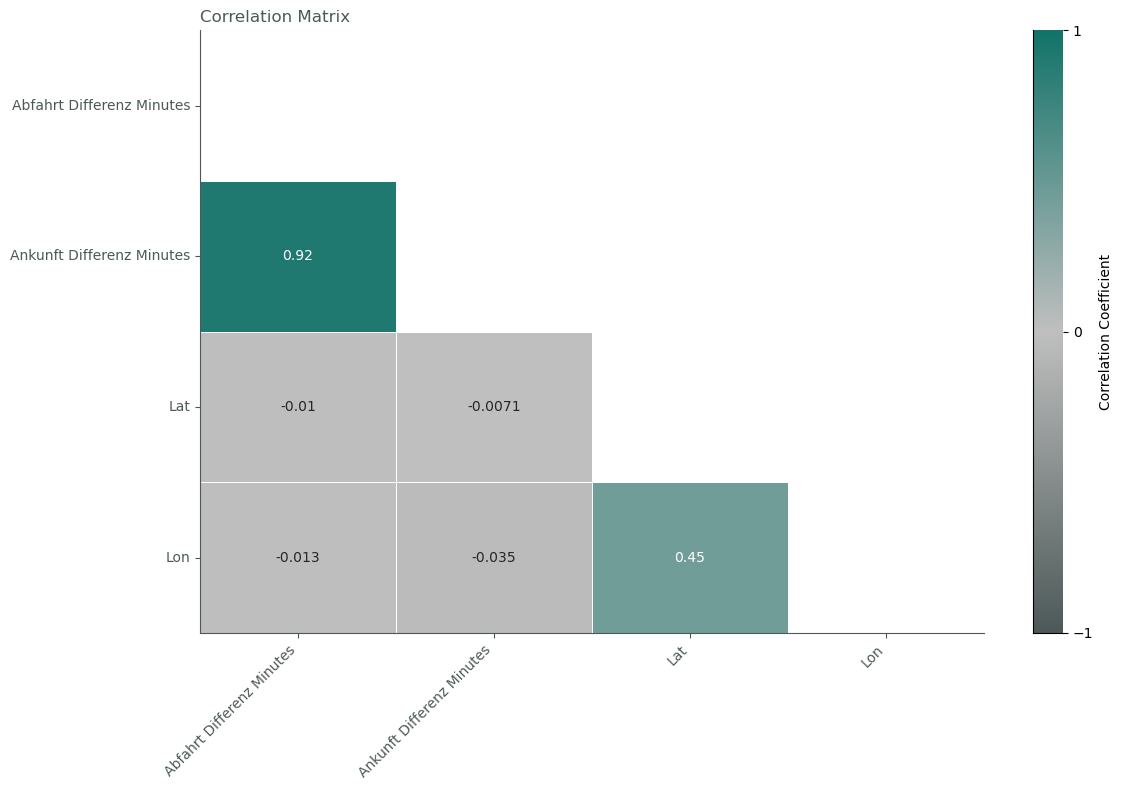

In [38]:
from matplotlib.colors import LinearSegmentedColormap

# Select the numerical columns for correlation analysis
numerical_columns = [
    'Abfahrt Differenz Minutes',
    'Ankunft Differenz Minutes',
    'Lat',
    'Lon'
]

# Compute the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Mask the upper triangle of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a custom diverging color palette
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', [color4, color5, color1])

# Plot the heatmap
with custom_plot(figsize=(12, 8)) as ax:
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap=custom_cmap, center=0, linewidths=0.5, ax=ax, 
                cbar_kws={'label': 'Correlation Coefficient', 'ticks': [-1, 0, 1]}, 
                vmin=-1, vmax=1, annot_kws={"size": 10}, 
                cbar=True)
    ax.set_title('Correlation Matrix', loc='left', color=color4)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', color=color4)
    plt.setp(ax.get_yticklabels(), rotation=0, color=color4)
    ax.spines['top'].set_color(color4)
    ax.spines['right'].set_color(color4)
    ax.spines['bottom'].set_color(color4)
    ax.spines['left'].set_color(color4)
    ax.title.set_color(color4)
    ax.xaxis.label.set_color(color4)
    ax.yaxis.label.set_color(color4)
    ax.tick_params(axis='x', colors=color4)
    ax.tick_params(axis='y', colors=color4)

plt.show()

## Additonal Info

In [39]:
df['Zusatzfahrt TF'].value_counts()

Zusatzfahrt TF
false    62719
true       328
Name: count, dtype: int64

In [40]:
df['Durchfahrt TF'].value_counts()

Durchfahrt TF
false    63020
true        27
Name: count, dtype: int64

In [41]:
# df.columns
# # df['Ab Prognose'].value_counts() # Datetime
# df['Ab Prognose Status'].value_counts()
# # df['Ab Prognose'].isnull().sum()

# # df['An Prognose'].value_counts() # Datetime
# df['An Prognose Status'].value_counts()
# # df['An Prognose'].isnull().sum()

# p_df = df[df['An Prognose Status'] == 'PROGNOSE' or df['Ab Prognose Status'] == 'PROGNOSE']
# u_df = df[df['An Prognose Status'] == 'UNBEKANNT' or df['Ab Prognose Status'] == 'UNBEKANNT']

# df = df[df['An Prognose Status'] != 'PROGNOSE']
# df = df[df['Ab Prognose Status'] != 'PROGNOSE']
# df = df[df['An Prognose Status'] != 'UNBEKANNT']
# df = df[df['Ab Prognose Status'] != 'UNBEKANNT']
# df = df.drop('An Prognose Satus', axis=1)
# df = df.drop('Ab Prognose Status', axis=1)

## Report

In [42]:
# df.to_csv('', index=False) # save df

In [47]:
# !pip install python-docx

import shutil
from datetime import datetime
from docx import Document

# Get today's date in 'YYYYMMDD' format
today = datetime.today().strftime('%Y%m%d')

# Content to be added to the Word document
content = """
Analysis of Train Delays in Switzerland
Executive Summary:
This report presents a comprehensive analysis of train delays in the Swiss railway system, focusing on patterns, causes, and impacts across various routes, times, and transportation types. The findings reveal insights into the punctuality of Swiss Federal Railways (SBB) and highlight areas for potential improvement.
Key Findings:

Delay Patterns:

Long-distance trains experience more significant delays.
Delays are most frequent during peak hours (morning commute, lunch break, and evening rush).
Trams have the highest frequency of delays, though these are typically short in duration.
Departure and arrival delays show a strong correlation, as expected.


Delay Statistics:

Average departure delay: 1.58 minutes
Average arrival delay: 1.16 minutes
Percentage of arrivals with delays: 8.51%
Percentage of departures with delays: 11.88%


Transportation Type Analysis:

S-Bahn (suburban rail) is the most common transportation type (40,132 instances), followed by regional trains (R) with 10,449 instances.
Long-distance trains (IC, EC, ICE, TGV, RJX, NJ) have fewer instances but longer delays.


High-Risk Stations:
The following stations have the highest probability of delays:

Düdingen (100%)
Wynigen (100%)
Flamatt (100%)
Ambrì-Piotta (75%)
Colmegna (61.54%)


Geographical Trends:

Central Swiss stations tend to be more punctual.
Border areas and major junction points experience disproportionately high delays.


Overall Performance:

SBB demonstrates relatively good punctuality, with less than 10% of 63,000 individual departures experiencing delays.


Station-Specific Data:

Zürich HB: Highest number of train movements (1,909)
Zürich Oerlikon: Second highest number of train movements (919)
Olten: Third highest number of train movements (722)


Additional Observations:

328 out of 63,047 trains were additional services (Zusatzfahrt).
652 out of 63,047 trains were cancelled.
Only 27 out of 63,047 trains were pass-through services without stops.


Cluster Analysis:
Four main clusters were identified:

Cluster 0: 44,940 instances (likely representing on-time or minor delays)
Cluster 1: 4,409 instances
Cluster 2: 28 instances (likely representing extreme delays)
Cluster 3: 2,285 instances


Temporal Distribution:

Trains operate from 00:20 to 02:11 the next day.
Peak arrival times are at 07:54 (75 instances) and 17:54 (73 instances).
Peak departure times are at 07:49 and 07:34 (74 instances each).



Conclusions:

The Swiss railway system generally maintains good punctuality, with only a small percentage 
of trains experiencing significant delays. However, there are clear patterns in delay occurrence, 
with long-distance trains and peak hours being more susceptible to delays. Certain stations and 
border areas also show higher risks of delays. The S-Bahn system, while experiencing the most 
delays in absolute numbers, tends to have shorter delay durations compared to long-distance services.


Recommendations:

Focus on improving punctuality for long-distance trains, particularly IC, EC, ICE, TGV, RJX, and NJ services.
Investigate and address issues at high-risk stations such as Düdingen, Wynigen, and Flamatt.
Enhance capacity and efficiency during peak hours to reduce delays.
Conduct further analysis on specific stations and routes to identify localized issues and solutions.
Implement targeted strategies for reducing both departure and arrival delays, especially for S-Bahn services 
which have the highest volume of traffic.

Further Research:

Additional statistical analysis focusing on specific stations, routes, and time periods could provide more 
detailed insights. Examining the causes of delays at problematic stations and for long-distance services 
could inform targeted improvement strategies. A more in-depth analysis of the identified clusters could 
also reveal patterns that may not be immediately apparent from the summary statistics.

"""

# Define the file path for the Word document using raw string
word_file_path = rf'' # insert your path

# Create a new Word document
doc = Document()
# Add content to the document
doc.add_paragraph(content)
# Save the document
doc.save(word_file_path)

print(f'CSV file saved as: {csv_filename}')
print(f'Word document saved as: {word_file_path}')


CSV file saved as: SBB_EDA_report_20240624.csv
Word document saved as: C:\Users\acer\Documents\SBB\SBB_EDA_report_20240624.docx
